In [1]:
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay  # Importar Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotl.
import requests # Import requests library to make HTTP requests in Python easily.
import pandas as pd
from scipy.spatial.distance import pdist, squareform 
from sklearn.decomposition import PCA
from scipy.spatial import KDTree

In [2]:
import os
import requests
import csv
#Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Mostrar las primeras filas del DataFrame
    print("Contenido de", archivo_csv)
    print(df.head(5))
    
    # Contar el número de IDs distintos
    num_ids_distintos = df['id'].nunique()
    print("Número de IDs distintos:", num_ids_distintos)

Contenido de -3_0_0.csv
   id Tipo    X   Y  Z
0   2    B  119  82  0
1   4    B  120  82  0
2   4    B  121  82  0
3   4    B  122  82  0
4   4    B  123  82  0
Número de IDs distintos: 164
Contenido de 9_0_0.csv
   id Tipo    X   Y  Z
0  11    A  124  82  0
1   4    B  125  82  0
2   4    B  126  82  0
3   5    A  127  82  0
4   5    A  128  82  0
Número de IDs distintos: 164
Contenido de -1_0_0.csv
   id Tipo    X   Y  Z
0   1    B  115  83  0
1   1    B  116  83  0
2   1    B  117  83  0
3   1    B  118  83  0
4   9    B  119  83  0
Número de IDs distintos: 164
Contenido de -5_0_0.csv
   id Tipo    X   Y  Z
0   2    B  118  82  0
1   2    B  119  82  0
2   2    B  120  82  0
3   2    B  121  82  0
4   2    B  122  82  0
Número de IDs distintos: 164
Contenido de 3_0_0.csv
   id Tipo    X   Y  Z
0  14    A  135  82  0
1   3    B  119  83  0
2   3    B  120  83  0
3   2    A  121  83  0
4   2    A  122  83  0
Número de IDs distintos: 164
Contenido de 5_0_0.csv
   id Tipo    X   Y  Z
0

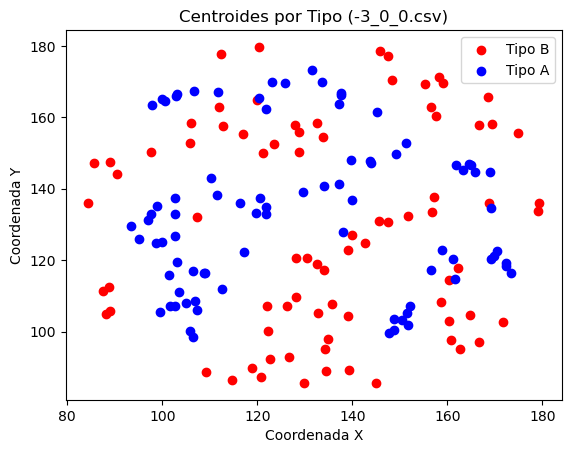

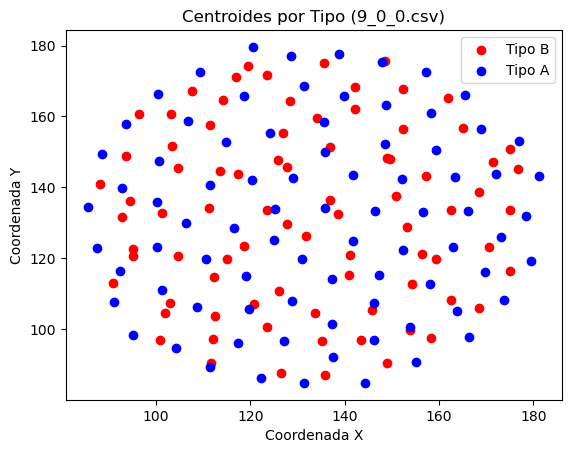

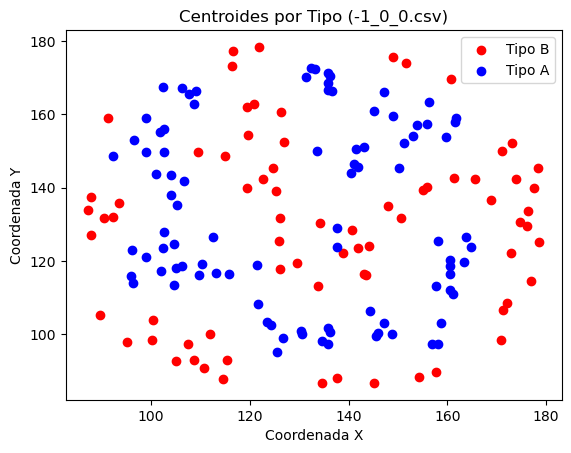

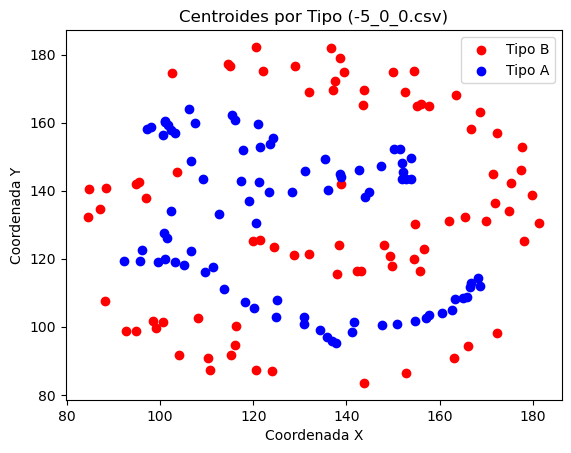

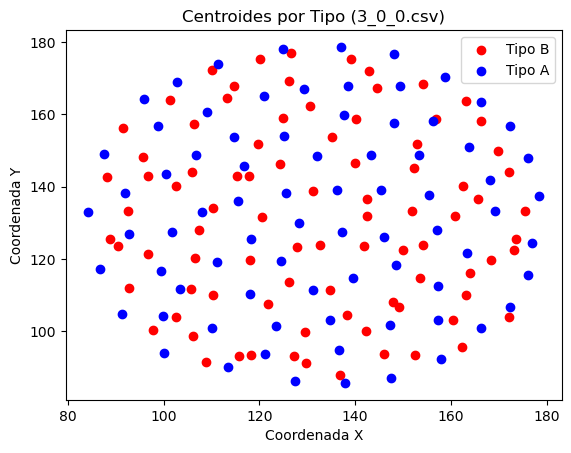

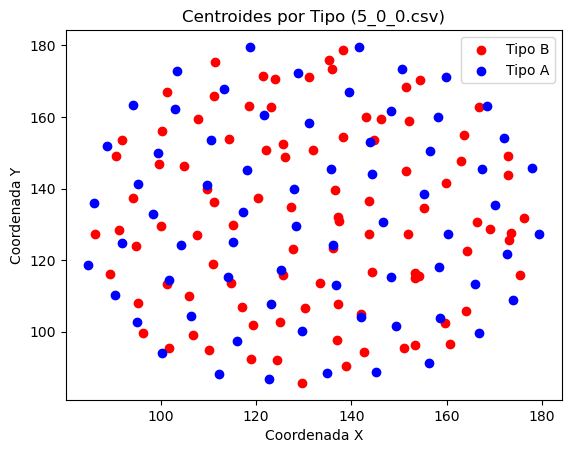

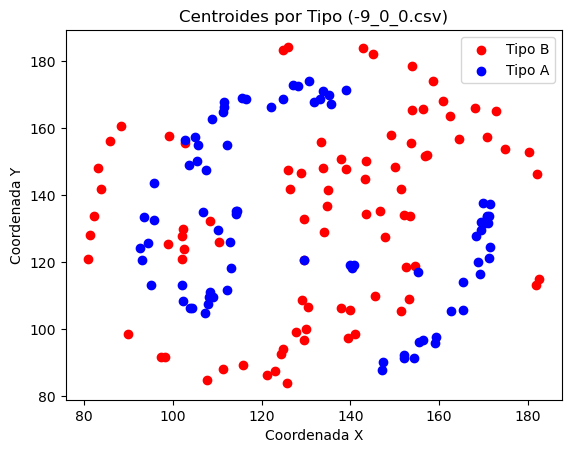

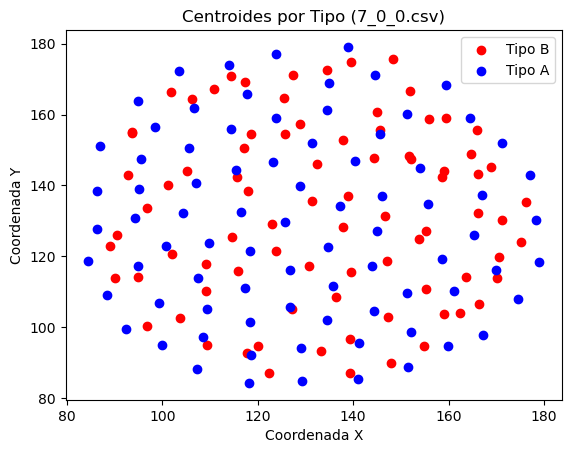

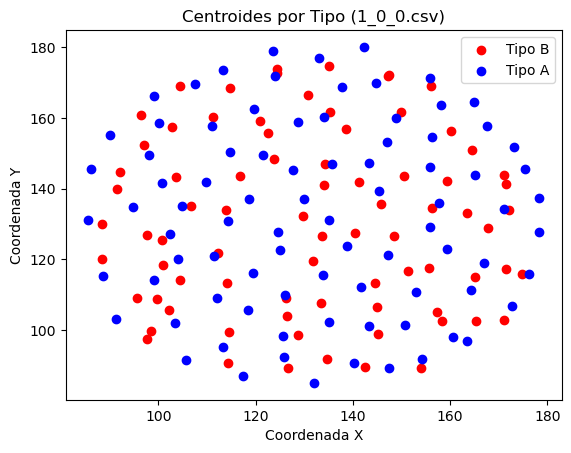

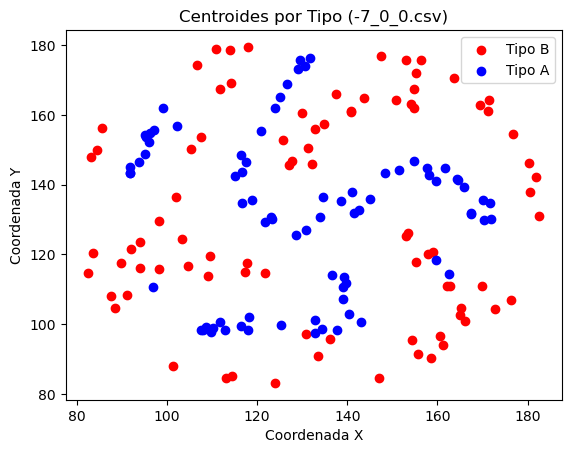

In [3]:
# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Agrupar los datos por el ID y el Tipo
    grupos = df.groupby(['id', 'Tipo'])
    
    # Inicializar listas para almacenar los centroides y tipos
    centroides_x = []
    centroides_y = []
    tipos_centroides = []
    
    # Calcular el centroide y el tipo para cada grupo
    for (id_grupo, tipo_grupo), grupo in grupos:
        X_grupo = grupo['X']
        Y_grupo = grupo['Y']
        centroid_x_grupo = X_grupo.mean()
        centroid_y_grupo = Y_grupo.mean()
        centroides_x.append(centroid_x_grupo)
        centroides_y.append(centroid_y_grupo)
        tipos_centroides.append(tipo_grupo)  # Guardar el tipo del grupo
    
    # Crear el gráfico de dispersión con centroides rojos y azules
    for tipo in set(tipos_centroides):
        color = 'b' if tipo == 'A' else 'r'  # Rojo para tipo 'A', azul para tipo 'B'
        indices_tipo = [i for i, t in enumerate(tipos_centroides) if t == tipo]
        centroides_x_tipo = [centroides_x[i] for i in indices_tipo]
        centroides_y_tipo = [centroides_y[i] for i in indices_tipo]
        plt.scatter(centroides_x_tipo, centroides_y_tipo, color=color, label=f'Tipo {tipo}')

    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Centroides por Tipo ({archivo_csv})')
    plt.legend()
    plt.show()


usetex mode requires TeX.


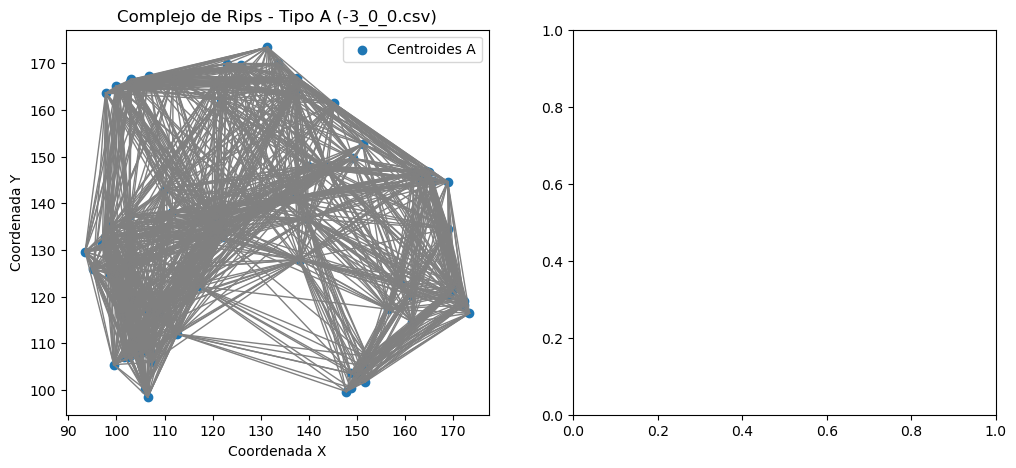

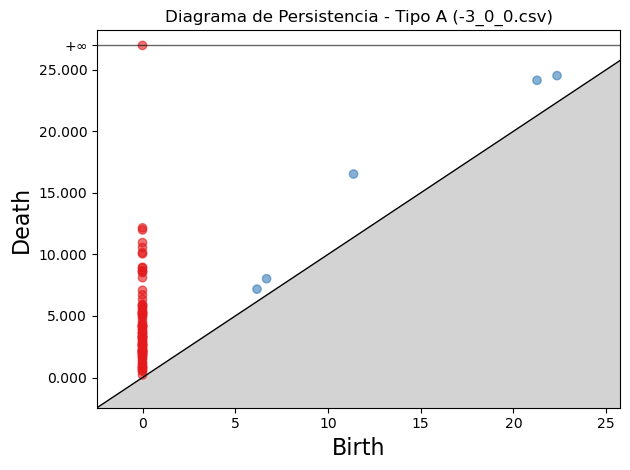

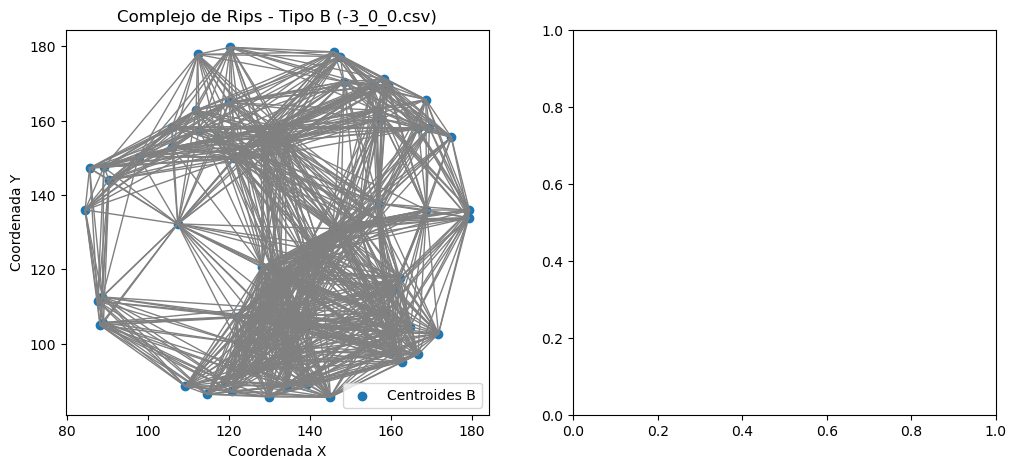

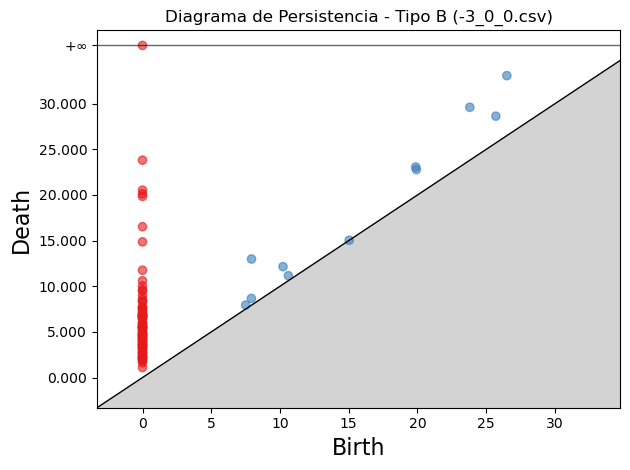

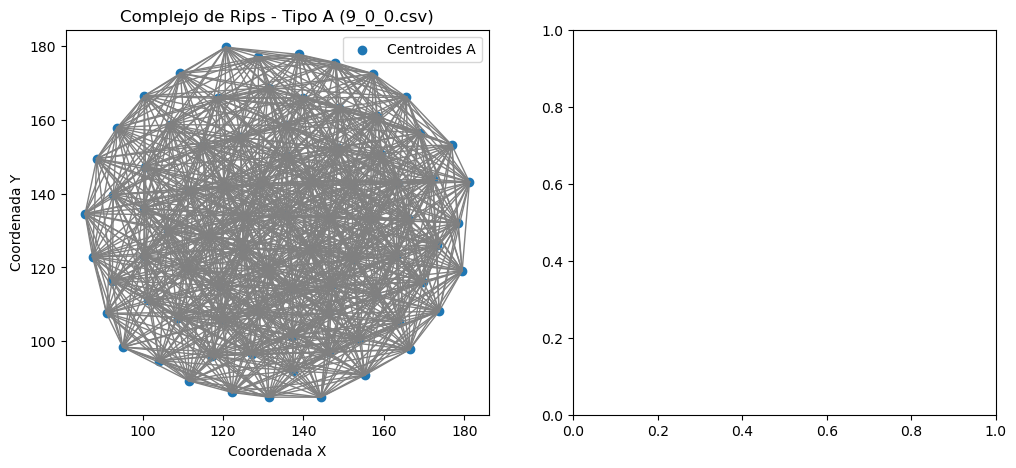

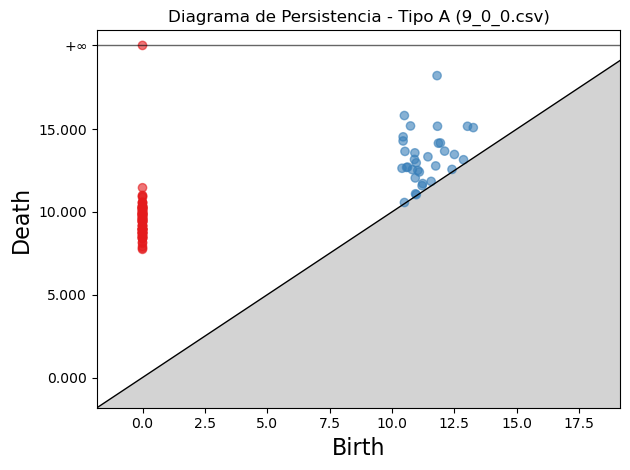

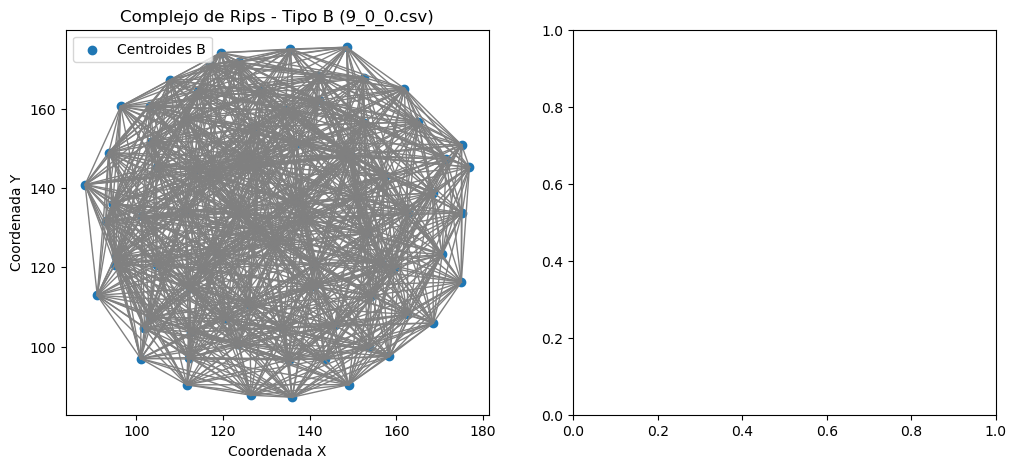

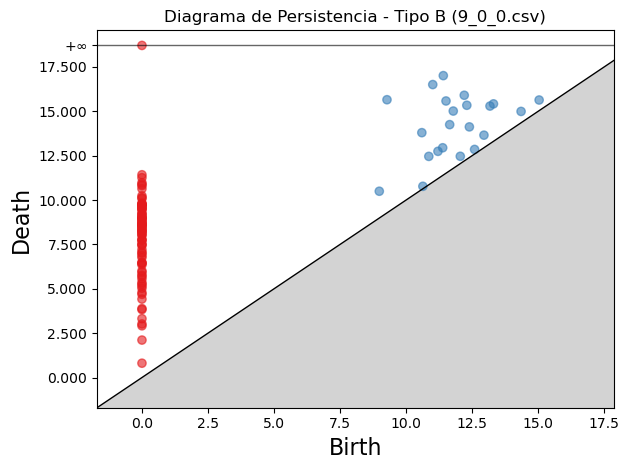

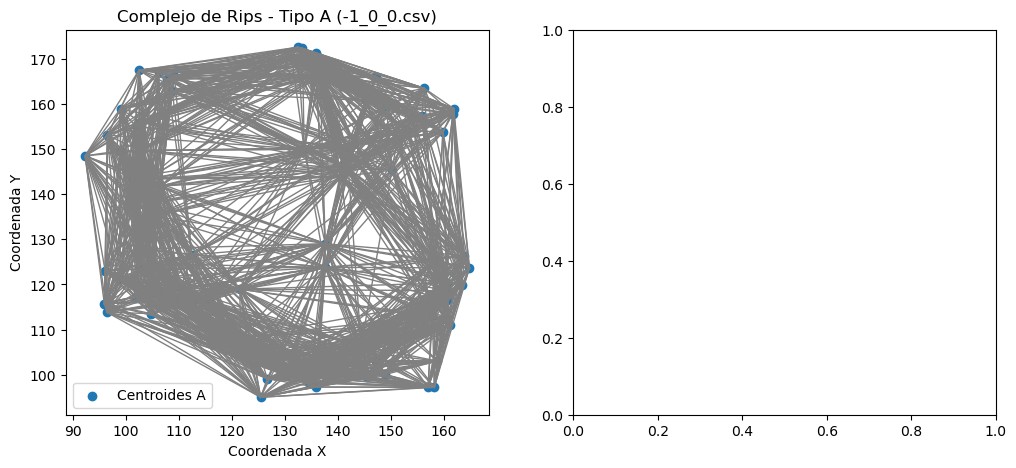

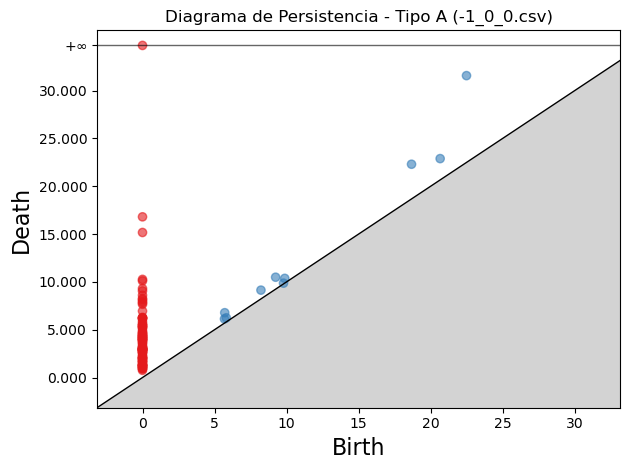

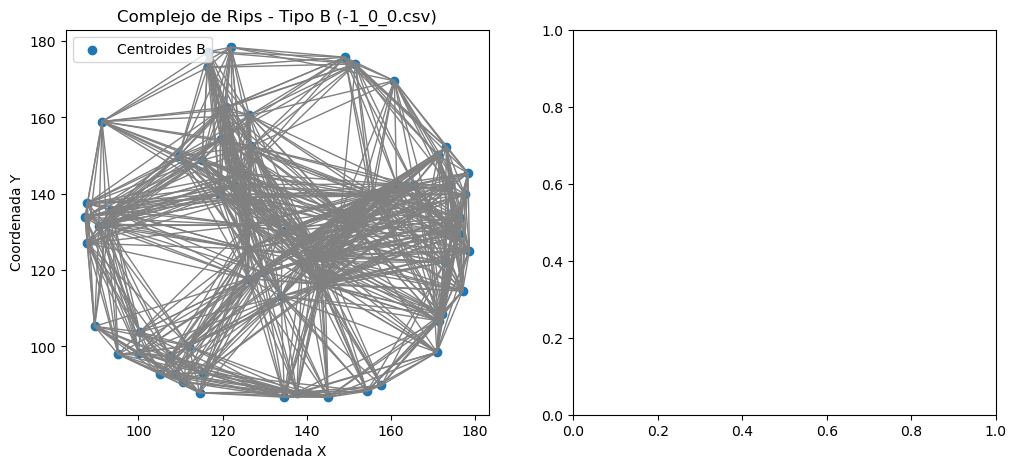

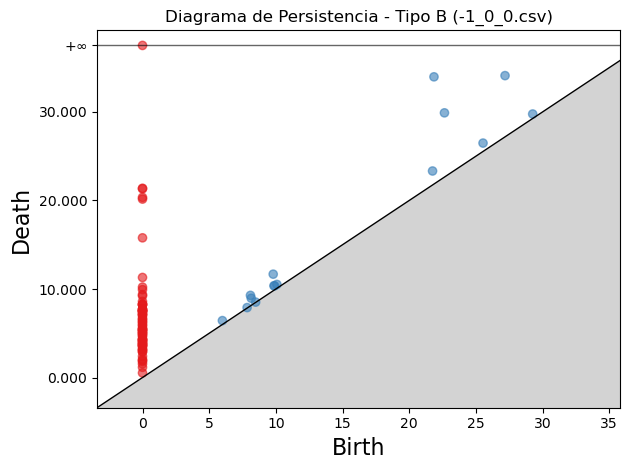

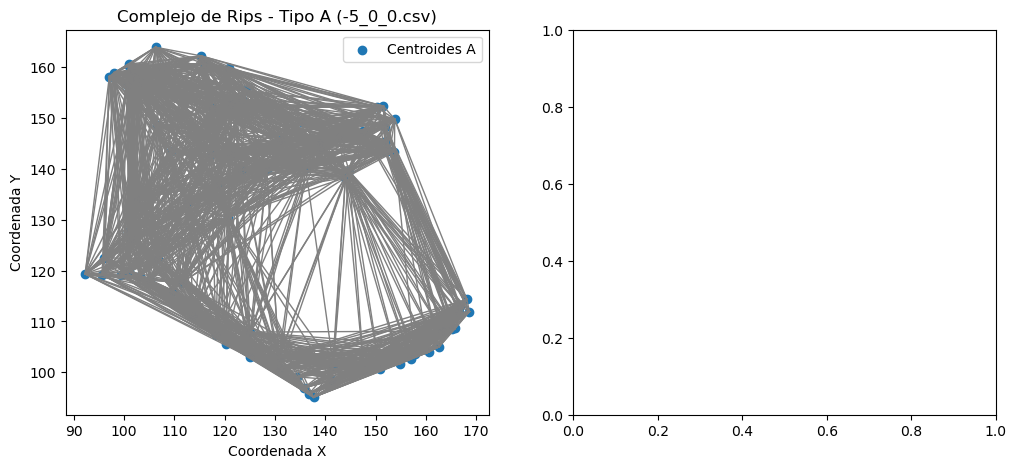

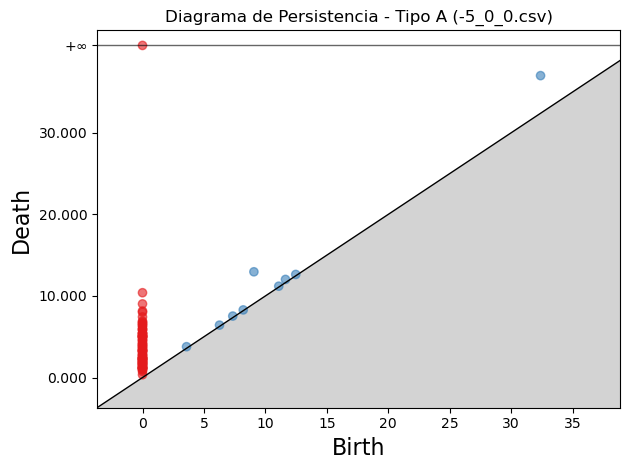

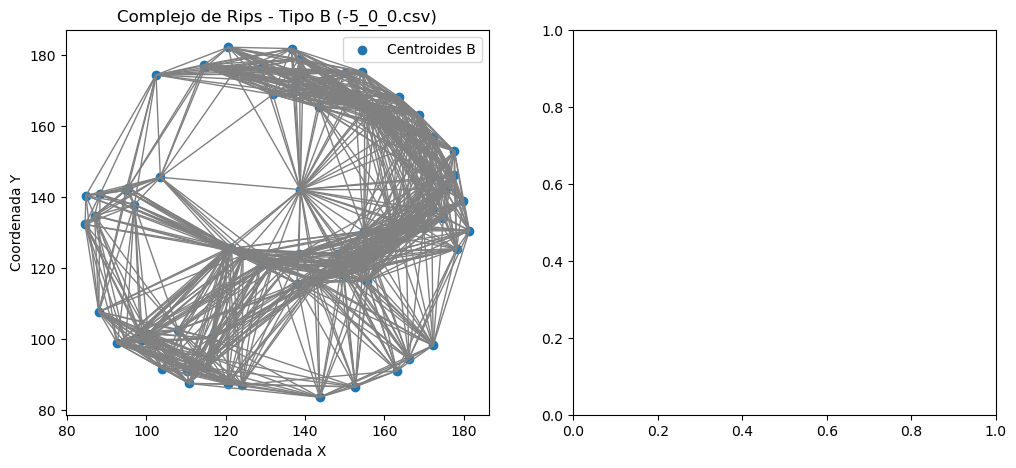

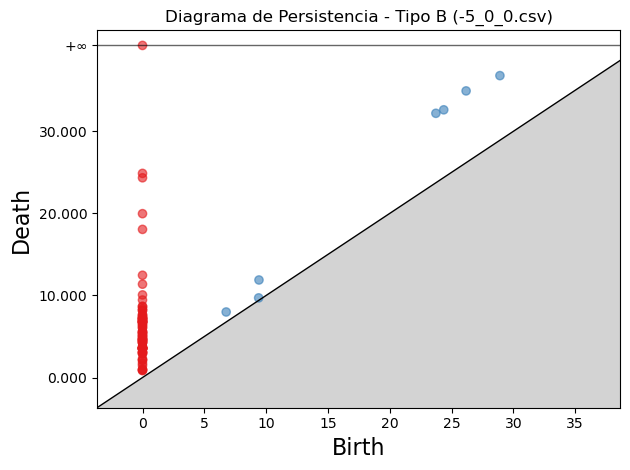

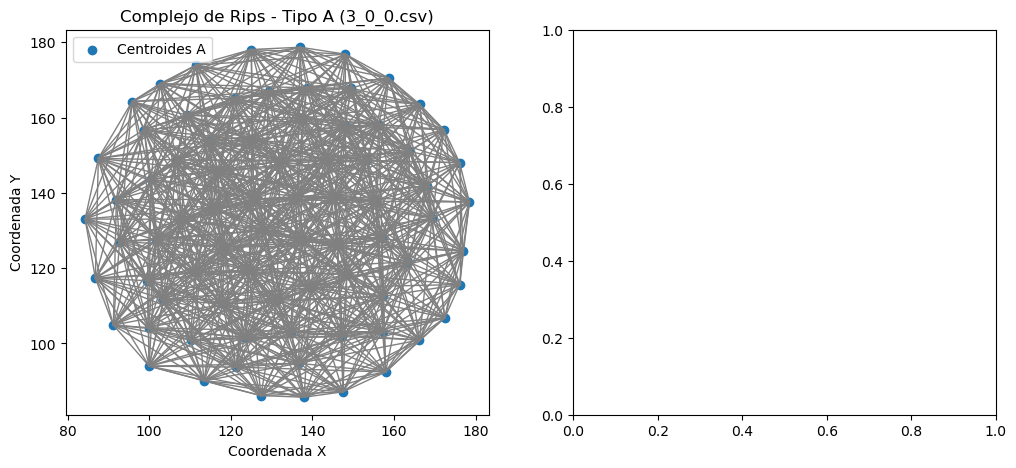

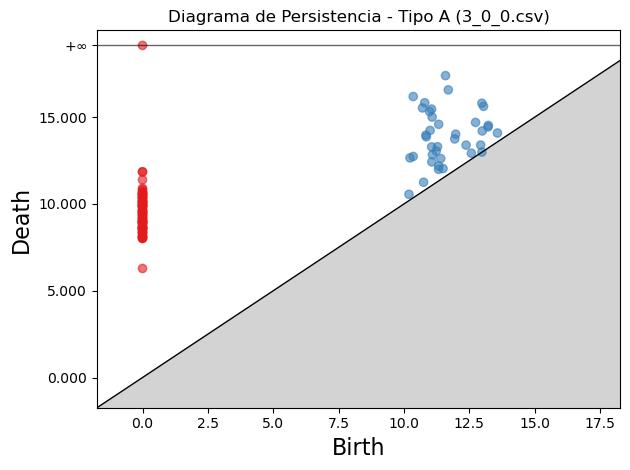

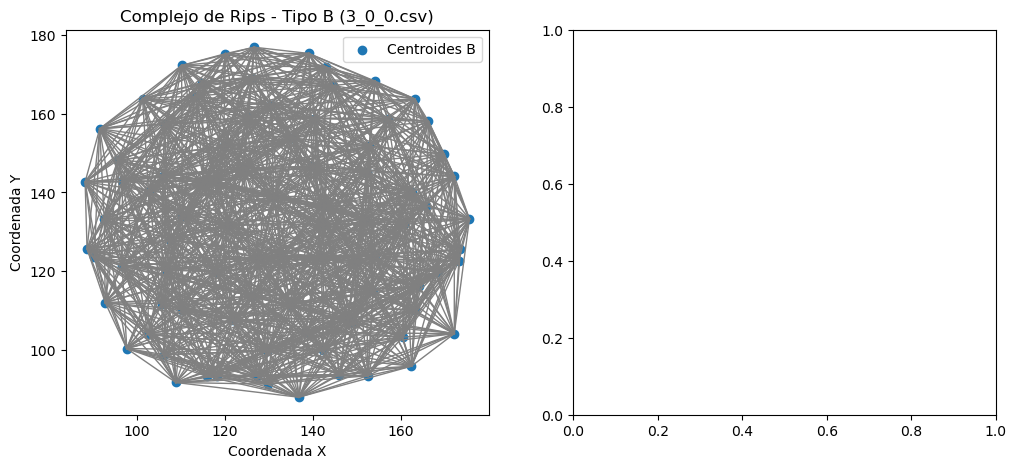

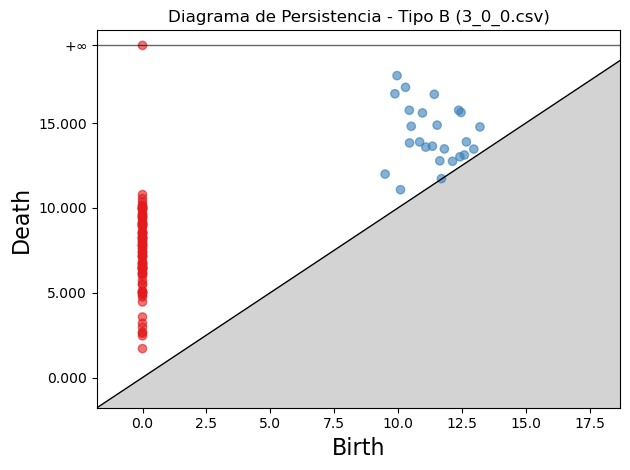

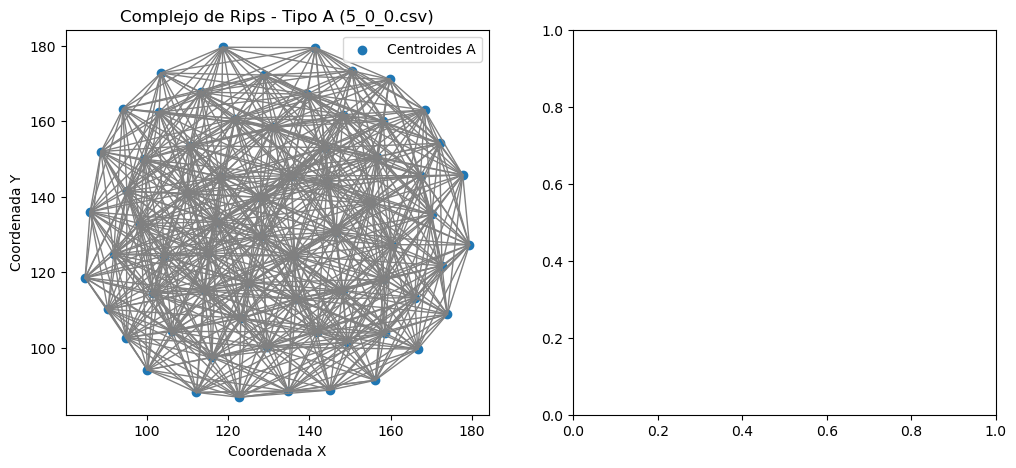

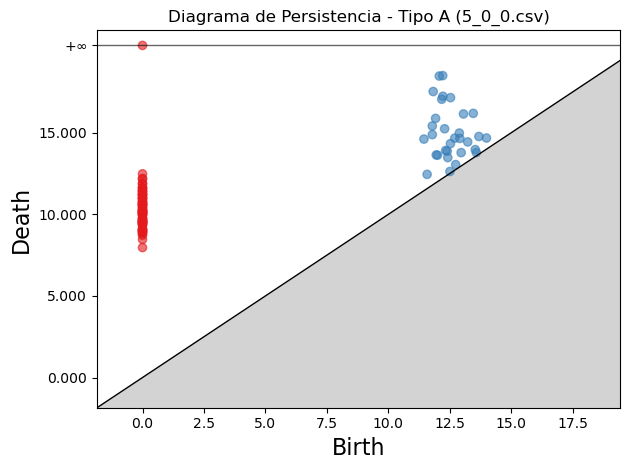

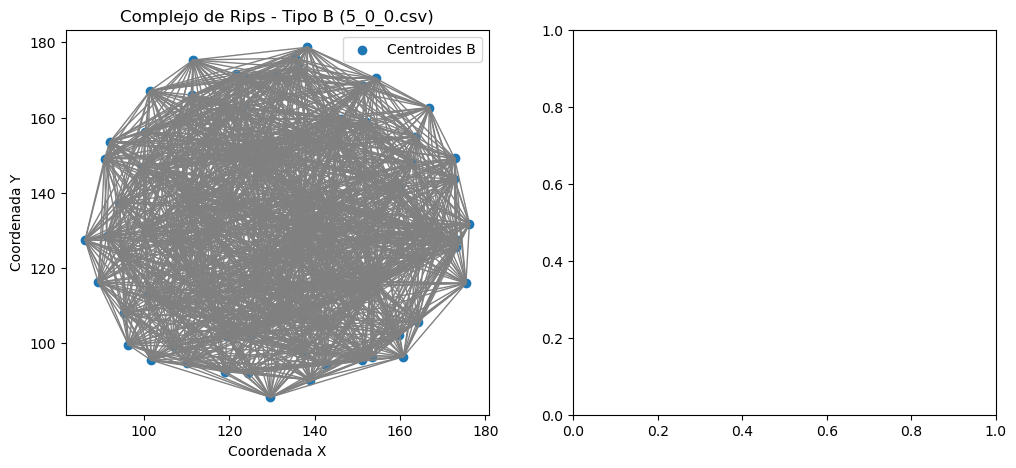

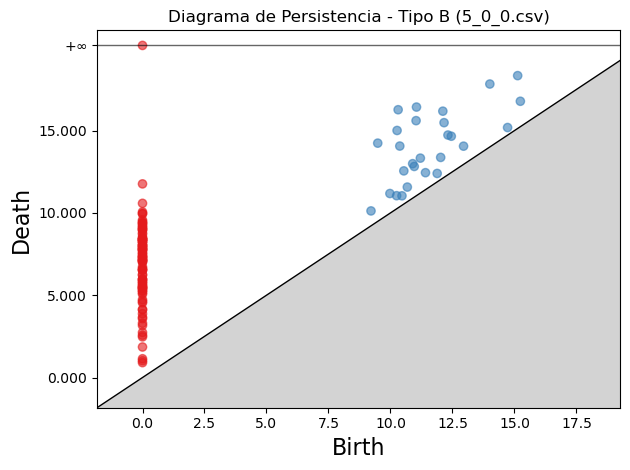

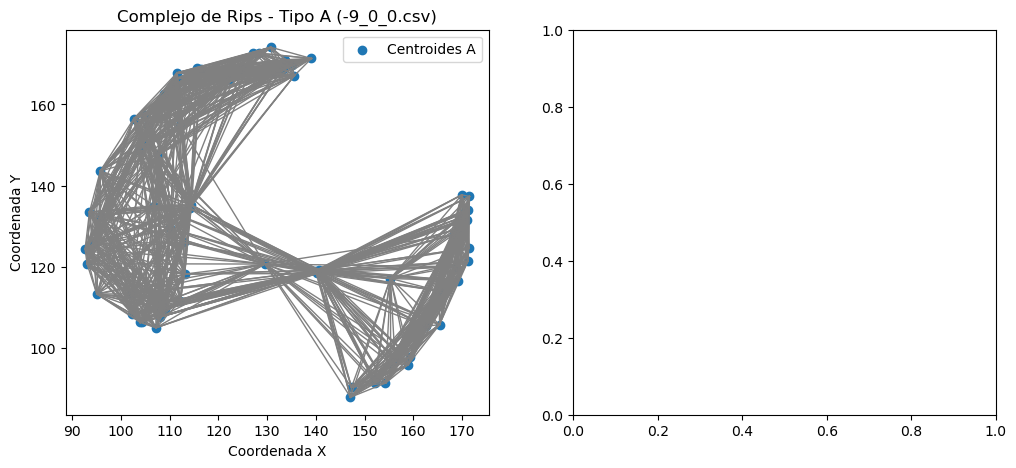

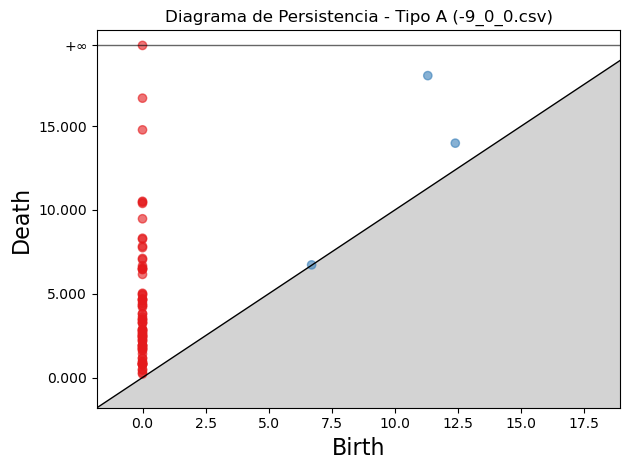

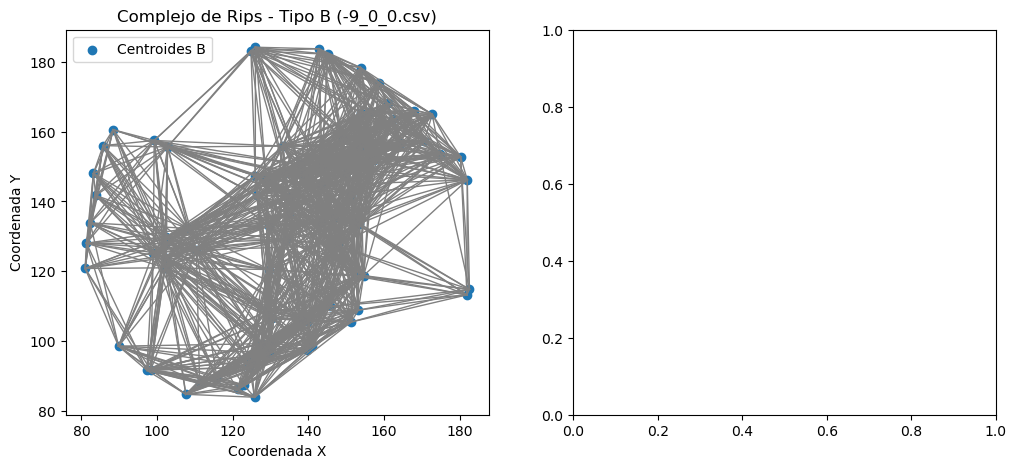

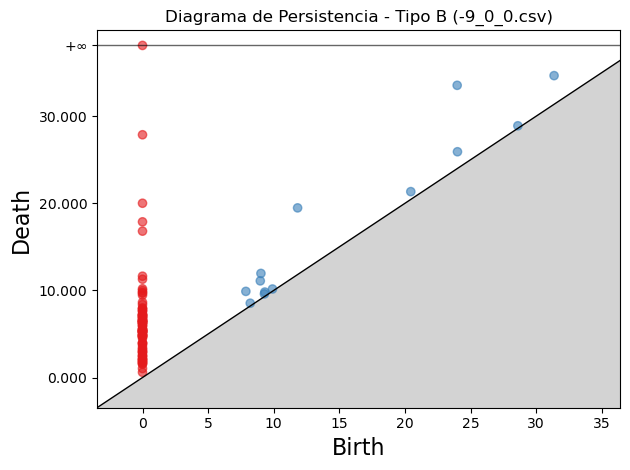

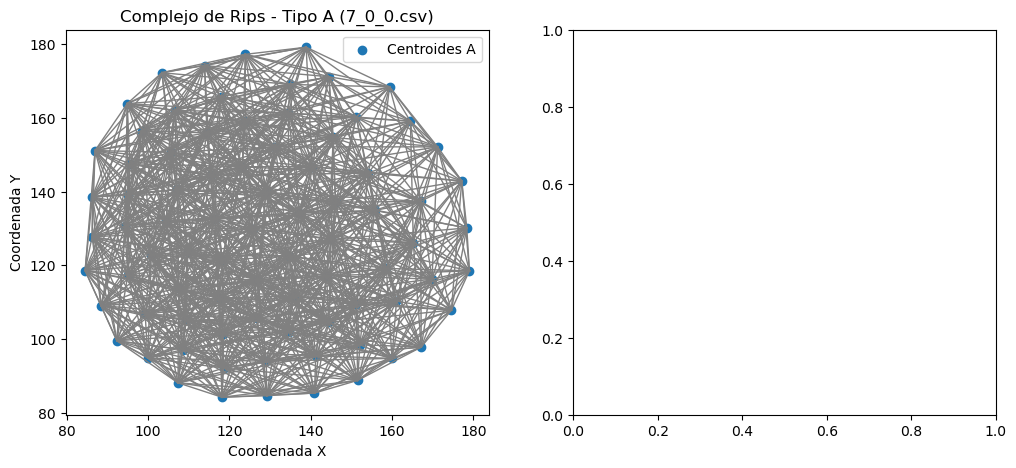

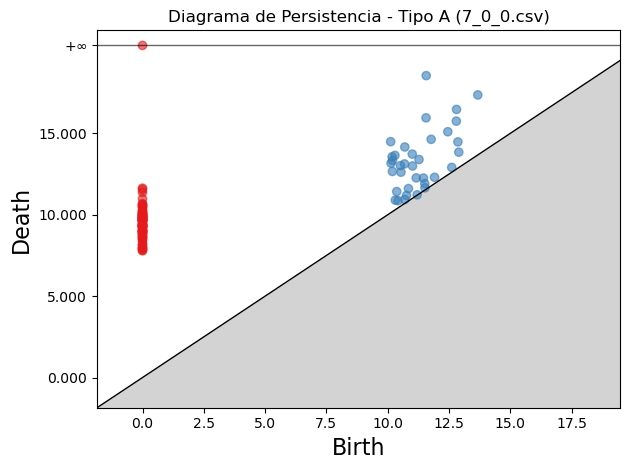

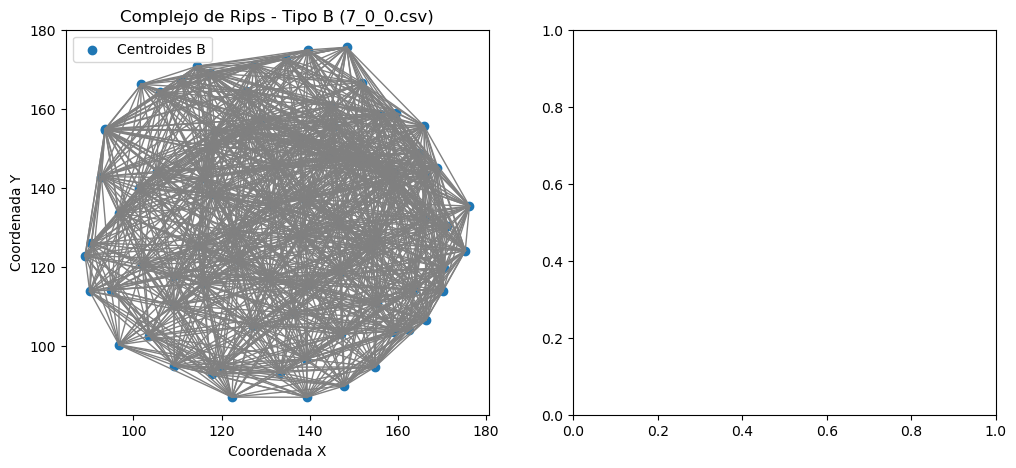

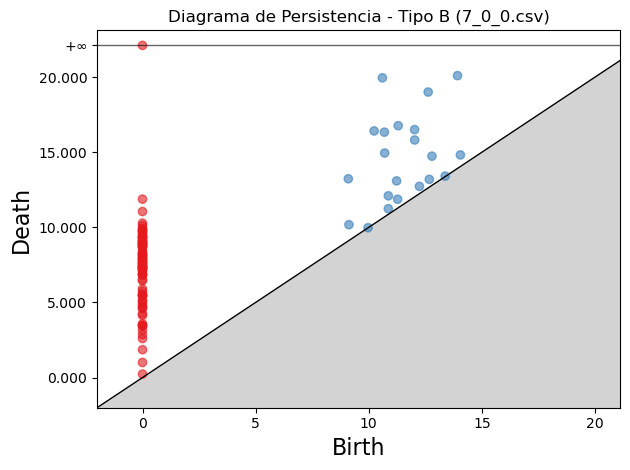

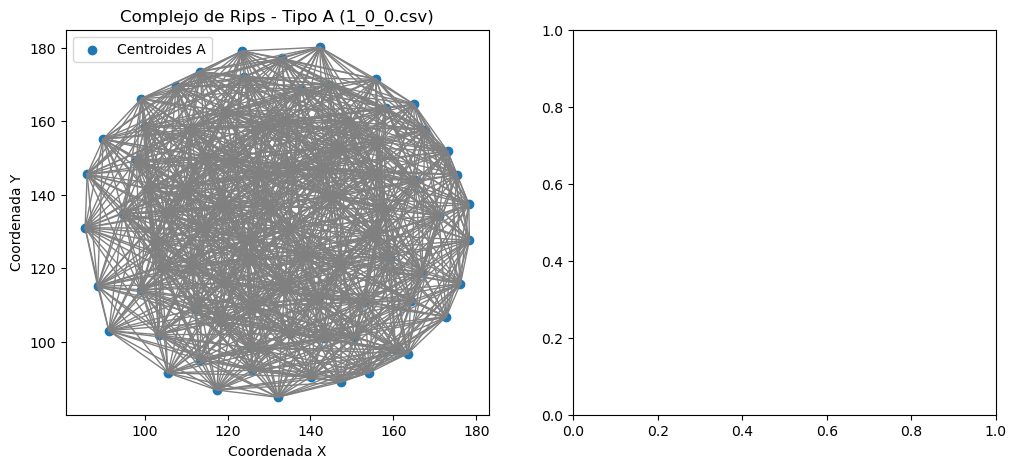

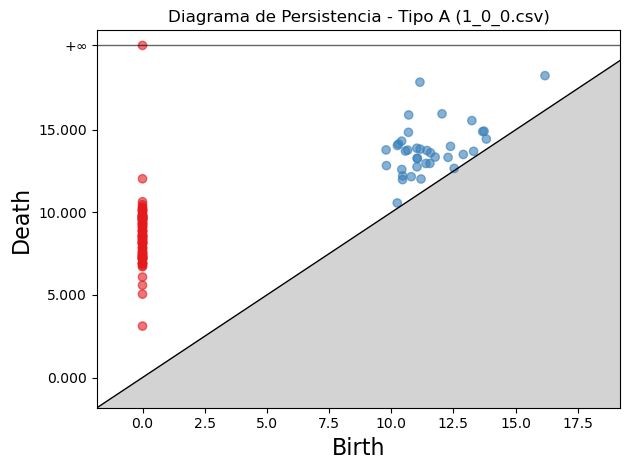

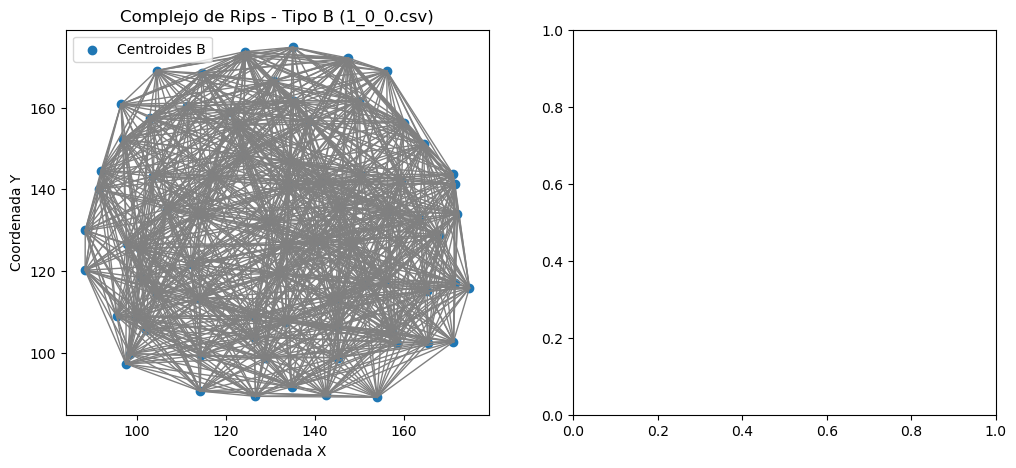

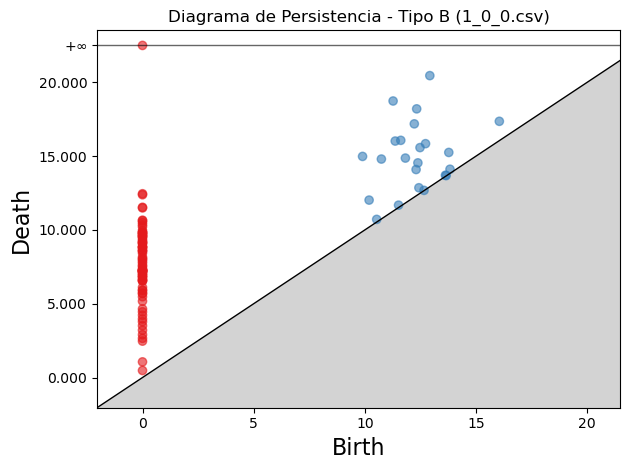

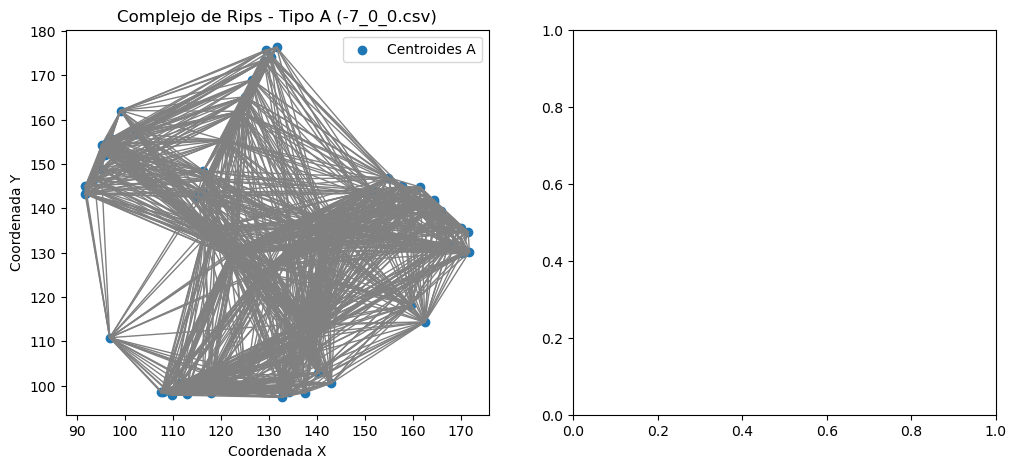

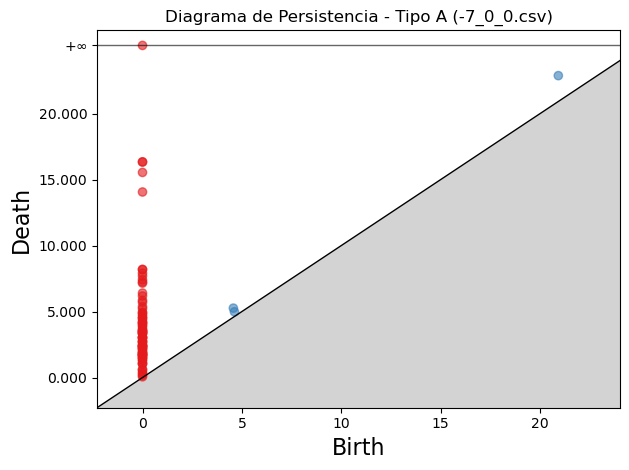

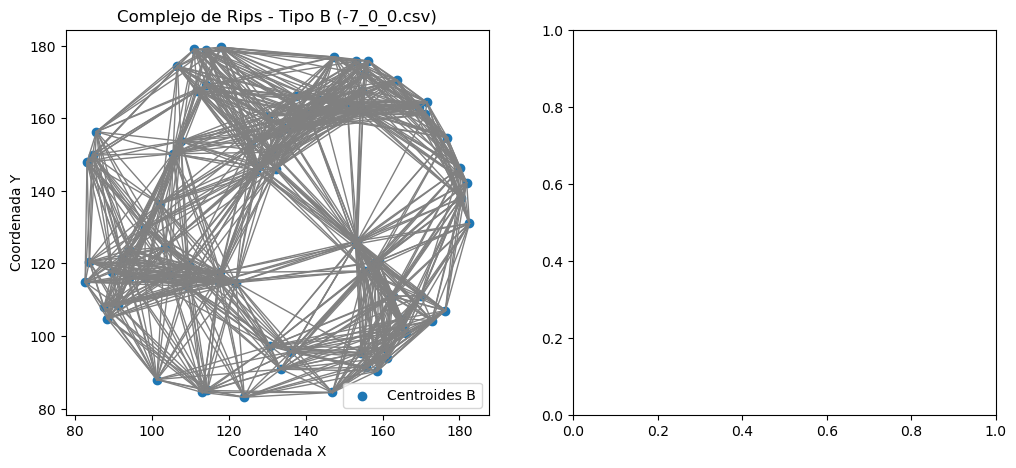

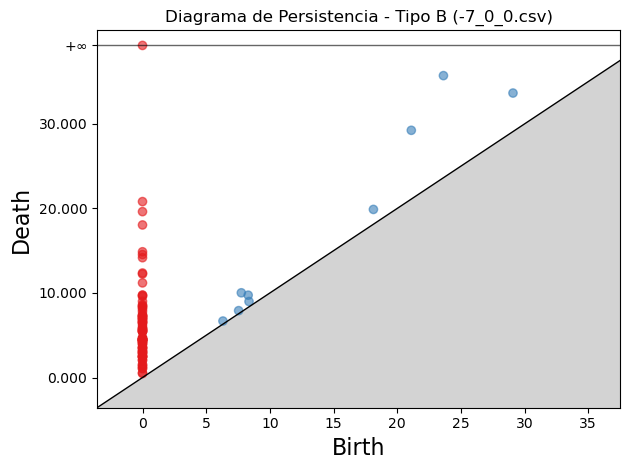

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Agrupar los datos por el Tipo
    grupos_por_tipo = df.groupby('Tipo')
    
    # Inicializar un diccionario para almacenar resultados
    resultados = {}
    
    # Iterar sobre cada grupo de tipo
    for tipo, grupo_tipo in grupos_por_tipo:
        # Agrupar por ID dentro de cada tipo
        grupos = grupo_tipo.groupby('id')
        
        # Inicializar listas para almacenar los centroides
        centroides_x = []
        centroides_y = []
        
        # Calcular el centroide para cada grupo
        for id_grupo, grupo in grupos:
            X_grupo = grupo['X']
            Y_grupo = grupo['Y']
            centroid_x_grupo = X_grupo.mean()
            centroid_y_grupo = Y_grupo.mean()
            centroides_x.append(centroid_x_grupo)
            centroides_y.append(centroid_y_grupo)
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(centroides_x, centroides_y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=40)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

        # Visualizar el complejo de Rips
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(centroides_x, centroides_y, label=f'Centroides {tipo}')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [centroides_x[i] for i in arista]
                y = [centroides_y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips - Tipo {tipo} ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()
        
        # Guardar los resultados en el diccionario
        resultados[tipo] = diag
        
        # Mostrar el diagrama de dispersión de persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia - Tipo {tipo} ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        plt.tight_layout()
        plt.show()

    # Los resultados están en el diccionario 'resultados', puedes acceder a ellos si lo necesitas


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

# Almacenar los diagramas de persistencia por tipo
diagramas_persistencia = {}
diagramas_persistencia_0 = {}

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    try:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa, header=None)
        nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
        df.columns = nombres_columnas
        
        # Agrupar los datos por el Tipo
        grupos_por_tipo = df.groupby('Tipo')
        
        # Inicializar un diccionario para almacenar resultados
        for tipo, grupo_tipo in grupos_por_tipo:
            # Agrupar por ID dentro de cada tipo
            grupos = grupo_tipo.groupby('id')
            
            # Inicializar listas para almacenar los centroides
            centroides_x = []
            centroides_y = []
            
            # Calcular el centroide para cada grupo
            for id_grupo, grupo in grupos:
                X_grupo = grupo['X']
                Y_grupo = grupo['Y']
                centroid_x_grupo = X_grupo.mean()
                centroid_y_grupo = Y_grupo.mean()
                centroides_x.append(centroid_x_grupo)
                centroides_y.append(centroid_y_grupo)
            
            # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
            puntos = np.array(list(zip(centroides_x, centroides_y)))

            # Calcular el complejo de Rips con un radio específico
            rips_complex = gd.RipsComplex(points=puntos, max_edge_length=40)
            simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

            # Calcular el diagrama de persistencia
            diag = simplex_tree.persistence()

            # Almacenar los diagramas de persistencia por tipo
            if tipo not in diagramas_persistencia:
                diagramas_persistencia[tipo] = {}
                diagramas_persistencia_0[tipo] = {}
            
            diagramas_persistencia[tipo][archivo_csv] = simplex_tree.persistence_intervals_in_dimension(1)
            diagramas_persistencia_0[tipo][archivo_csv] = simplex_tree.persistence_intervals_in_dimension(0)
        
    except Exception as e:
        print(f"Error al procesar el archivo {archivo_csv}: {e}")

# Calcular las distancias de Bottleneck entre todos los pares de diagramas de persistencia por tipo
tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

# Inicializar matrices de distancias
distancias_por_tipo = {}

for tipo in diagramas_persistencia.keys():
    archivos = list(diagramas_persistencia[tipo].keys())
    n = len(archivos)
    
    distancias_dim1 = np.zeros((n, n))
    distancias_dim0 = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            archivo_i = archivos[i]
            archivo_j = archivos[j]
            diag_i = diagramas_persistencia[tipo][archivo_i]
            diag_j = diagramas_persistencia[tipo][archivo_j]
            diag_i_0 = diagramas_persistencia_0[tipo][archivo_i]
            diag_j_0 = diagramas_persistencia_0[tipo][archivo_j]
            
            distancia_bottleneck = gd.bottleneck_distance(diag_i, diag_j)
            distancia_bottleneck_0 = gd.bottleneck_distance(diag_i_0, diag_j_0)
            
            distancias_dim1[i, j] = distancia_bottleneck
            distancias_dim1[j, i] = distancia_bottleneck
            distancias_dim0[i, j] = distancia_bottleneck_0
            distancias_dim0[j, i] = distancia_bottleneck_0
            
            # Verificar que la distancia de Bottleneck para el mismo archivo es efectivamente cero
            if i == j:
                if distancia_bottleneck < tolerancia:
                    print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} en tipo {tipo} es efectivamente cero.")
                else:
                    print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} en tipo {tipo} no es cero: {distancia_bottleneck}")
                
                if distancia_bottleneck_0 < tolerancia:
                    print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} en tipo {tipo} es efectivamente cero.")
                else:
                    print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} en tipo {tipo} no es cero: {distancia_bottleneck_0}")
    
    # Almacenar las distancias en el diccionario por tipo
    distancias_por_tipo[tipo] = {
        'dim1': distancias_dim1,
        'dim0': distancias_dim0
    }

# Las distancias de Bottleneck están ahora almacenadas en 'distancias_por_tipo'


Distancia de Bottleneck (Dimensión 1) para -3_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -3_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 9_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 9_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para -1_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -1_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para -5_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -5_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 3_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 3_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 5_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 5_0_0

In [6]:
import os
import pandas as pd
import numpy as np
import gudhi as gd
import gudhi.wasserstein as gw  # Importar el submódulo correcto

# Almacenar los diagramas de persistencia por tipo
diagramas_persistencia = {}
diagramas_persistencia_0 = {}

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    try:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa, header=None)
        nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
        df.columns = nombres_columnas
        
        # Agrupar los datos por el Tipo
        grupos_por_tipo = df.groupby('Tipo')
        
        # Inicializar un diccionario para almacenar resultados
        for tipo, grupo_tipo in grupos_por_tipo:
            # Agrupar por ID dentro de cada tipo
            grupos = grupo_tipo.groupby('id')
            
            # Inicializar listas para almacenar los centroides
            centroides_x = []
            centroides_y = []
            
            # Calcular el centroide para cada grupo
            for id_grupo, grupo in grupos:
                X_grupo = grupo['X']
                Y_grupo = grupo['Y']
                centroid_x_grupo = X_grupo.mean()
                centroid_y_grupo = Y_grupo.mean()
                centroides_x.append(centroid_x_grupo)
                centroides_y.append(centroid_y_grupo)
            
            # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
            puntos = np.array(list(zip(centroides_x, centroides_y)))

            # Calcular el complejo de Rips con un radio específico
            rips_complex = gd.RipsComplex(points=puntos, max_edge_length=40)
            simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

            # Calcular el diagrama de persistencia
            diag = simplex_tree.persistence()

            # Almacenar los diagramas de persistencia por tipo
            if tipo not in diagramas_persistencia:
                diagramas_persistencia[tipo] = {}
                diagramas_persistencia_0[tipo] = {}
            
            diagramas_persistencia[tipo][archivo_csv] = simplex_tree.persistence_intervals_in_dimension(1)
            diagramas_persistencia_0[tipo][archivo_csv] = simplex_tree.persistence_intervals_in_dimension(0)
        
    except Exception as e:
        print(f"Error al procesar el archivo {archivo_csv}: {e}")

# Calcular las distancias de Wasserstein entre todos los pares de diagramas de persistencia por tipo
tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

# Inicializar diccionario para almacenar distancias de Wasserstein
distancias_por_tipo = {}

for tipo in diagramas_persistencia.keys():
    archivos = list(diagramas_persistencia[tipo].keys())
    n = len(archivos)
    
    distancias_wasserstein_dim1 = np.zeros((n, n))
    distancias_wasserstein_dim0 = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            archivo_i = archivos[i]
            archivo_j = archivos[j]
            diag_i = diagramas_persistencia[tipo][archivo_i]
            diag_j = diagramas_persistencia[tipo][archivo_j]
            diag_i_0 = diagramas_persistencia_0[tipo][archivo_i]
            diag_j_0 = diagramas_persistencia_0[tipo][archivo_j]
            
            # Calcular la distancia de Wasserstein
            distancia_wasserstein = gw.wasserstein_distance(diag_i, diag_j, order=1)  # 'order' puede ser 1 o 2
            distancia_wasserstein_0 = gw.wasserstein_distance(diag_i_0, diag_j_0, order=1)
            
            # Almacenar las distancias en las matrices
            distancias_wasserstein_dim1[i, j] = distancia_wasserstein
            distancias_wasserstein_dim1[j, i] = distancia_wasserstein
            distancias_wasserstein_dim0[i, j] = distancia_wasserstein_0
            distancias_wasserstein_dim0[j, i] = distancia_wasserstein_0
            
            # Verificar que las distancias de Wasserstein para el mismo archivo son efectivamente cero
            if i == j:
                if distancia_wasserstein < tolerancia:
                    print(f"Distancia de Wasserstein (Dimensión 1) para {archivo_i} en tipo {tipo} es efectivamente cero.")
                else:
                    print(f"Distancia de Wasserstein (Dimensión 1) para {archivo_i} en tipo {tipo} no es cero: {distancia_wasserstein}")
                
                if distancia_wasserstein_0 < tolerancia:
                    print(f"Distancia de Wasserstein (Dimensión 0) para {archivo_i} en tipo {tipo} es efectivamente cero.")
                else:
                    print(f"Distancia de Wasserstein (Dimensión 0) para {archivo_i} en tipo {tipo} no es cero: {distancia_wasserstein_0}")
    
    # Almacenar las distancias en el diccionario por tipo
    distancias_por_tipo[tipo] = {
        'dim1': distancias_wasserstein_dim1,
        'dim0': distancias_wasserstein_dim0
    }

# Las distancias de Wasserstein están ahora almacenadas en 'distancias_por_tipo'


Distancia de Wasserstein (Dimensión 1) para -3_0_0.csv en tipo A es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para -3_0_0.csv en tipo A es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 9_0_0.csv en tipo A es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 9_0_0.csv en tipo A es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para -1_0_0.csv en tipo A es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para -1_0_0.csv en tipo A es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para -5_0_0.csv en tipo A es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para -5_0_0.csv en tipo A es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 3_0_0.csv en tipo A es efectivamente cero.
Distancia de Wasserstein (Dimensión 0) para 3_0_0.csv en tipo A es efectivamente cero.
Distancia de Wasserstein (Dimensión 1) para 5_0_0.csv en tipo A es efectivamente cero.
Distancia de Wasserstein (Dimensión 0

In [8]:
# Inicializar diccionario para almacenar ambas distancias por tipo
distancias_totales_por_tipo = {}

for tipo in diagramas_persistencia.keys():
    # Almacenar las distancias de Bottleneck
    distancias_totales_por_tipo[tipo] = {
        'bottleneck': distancias_por_tipo[tipo]['dim1'],  # distancias_dim1 de Bottleneck
        'wasserstein': distancias_por_tipo[tipo]['dim1']   # distancias_dim1 de Wasserstein
    }


In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
import gudhi.wasserstein as gw
import seaborn as sns

# Definir la ruta del directorio y los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv"

archivos_csv = os.listdir(ruta_directorio)

# Almacenar los diagramas de persistencia por tipo
diagramas_persistencia = {}
diagramas_persistencia_0 = {}

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    try:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa, header=None)
        nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
        df.columns = nombres_columnas
        
        # Agrupar los datos por el Tipo
        grupos_por_tipo = df.groupby('Tipo')
        
        # Inicializar un diccionario para almacenar resultados
        for tipo, grupo_tipo in grupos_por_tipo:
            # Agrupar por ID dentro de cada tipo
            grupos = grupo_tipo.groupby('id')
            
            # Inicializar listas para almacenar los centroides
            centroides_x = []
            centroides_y = []
            
            # Calcular el centroide para cada grupo
            for id_grupo, grupo in grupos:
                X_grupo = grupo['X']
                Y_grupo = grupo['Y']
                centroid_x_grupo = X_grupo.mean()
                centroid_y_grupo = Y_grupo.mean()
                centroides_x.append(centroid_x_grupo)
                centroides_y.append(centroid_y_grupo)
            
            # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
            puntos = np.array(list(zip(centroides_x, centroides_y)))

            # Calcular el complejo de Rips con un radio específico
            rips_complex = gd.RipsComplex(points=puntos, max_edge_length=40)
            simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

            # Calcular el diagrama de persistencia
            diag = simplex_tree.persistence()

            # Almacenar los diagramas de persistencia por tipo
            if tipo not in diagramas_persistencia:
                diagramas_persistencia[tipo] = {}
                diagramas_persistencia_0[tipo] = {}
            
            diagramas_persistencia[tipo][archivo_csv] = simplex_tree.persistence_intervals_in_dimension(1)
            diagramas_persistencia_0[tipo][archivo_csv] = simplex_tree.persistence_intervals_in_dimension(0)
        
    except Exception as e:
        print(f"Error al procesar el archivo {archivo_csv}: {e}")

# Calcular las distancias de Bottleneck entre todos los pares de diagramas de persistencia por tipo
tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

# Inicializar diccionario para almacenar distancias de Bottleneck
distancias_por_tipo = {}

for tipo in diagramas_persistencia.keys():
    archivos = list(diagramas_persistencia[tipo].keys())
    n = len(archivos)
    
    distancias_dim1 = np.zeros((n, n))
    distancias_dim0 = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            archivo_i = archivos[i]
            archivo_j = archivos[j]
            diag_i = diagramas_persistencia[tipo][archivo_i]
            diag_j = diagramas_persistencia[tipo][archivo_j]
            diag_i_0 = diagramas_persistencia_0[tipo][archivo_i]
            diag_j_0 = diagramas_persistencia_0[tipo][archivo_j]
            
            distancia_bottleneck = gd.bottleneck_distance(diag_i, diag_j)
            distancia_bottleneck_0 = gd.bottleneck_distance(diag_i_0, diag_j_0)
            
            distancias_dim1[i, j] = distancia_bottleneck
            distancias_dim1[j, i] = distancia_bottleneck
            distancias_dim0[i, j] = distancia_bottleneck_0
            distancias_dim0[j, i] = distancia_bottleneck_0
            
            # Verificar que la distancia de Bottleneck para el mismo archivo es efectivamente cero
            if i == j:
                if distancia_bottleneck < tolerancia:
                    print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} en tipo {tipo} es efectivamente cero.")
                else:
                    print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} en tipo {tipo} no es cero: {distancia_bottleneck}")
                
                if distancia_bottleneck_0 < tolerancia:
                    print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} en tipo {tipo} es efectivamente cero.")
                else:
                    print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} en tipo {tipo} no es cero: {distancia_bottleneck_0}")
    
    # Almacenar las distancias en el diccionario por tipo
    distancias_por_tipo[tipo] = {
        'dim1': distancias_dim1,
        'dim0': distancias_dim0,
        'suma': distancias_dim1 + distancias_dim0
    }

# Calcular las distancias de Wasserstein entre todos los pares de diagramas de persistencia por tipo
# Inicializar diccionario para almacenar distancias de Wasserstein
distancias_wasserstein_por_tipo = {}

for tipo in diagramas_persistencia.keys():
    archivos = list(diagramas_persistencia[tipo].keys())
    n = len(archivos)
    
    distancias_wasserstein_dim1 = np.zeros((n, n))
    distancias_wasserstein_dim0 = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            archivo_i = archivos[i]
            archivo_j = archivos[j]
            diag_i = diagramas_persistencia[tipo][archivo_i]
            diag_j = diagramas_persistencia[tipo][archivo_j]
            diag_i_0 = diagramas_persistencia_0[tipo][archivo_i]
            diag_j_0 = diagramas_persistencia_0[tipo][archivo_j]
            
          
            distancia_wasserstein = gw.wasserstein_distance(diag_i, diag_j, order=1)
            distancia_wasserstein_0 = gw.wasserstein_distance(diag_i_0, diag_j_0, order=1)
            

            distancias_wasserstein_dim1[i, j] = distancia_wasserstein
            distancias_wasserstein_dim1[j, i] = distancia_wasserstein
            distancias_wasserstein_dim0[i, j] = distancia_wasserstein_0
            distancias_wasserstein_dim0[j, i] = distancia_wasserstein_0
            

            if i == j:
                if distancia_wasserstein < tolerancia:
                    print(f"Distancia de Wasserstein (Dimensión 1) para {archivo_i} en tipo {tipo} es efectivamente cero.")
                else:
                    print(f"Distancia de Wasserstein (Dimensión 1) para {archivo_i} en tipo {tipo} no es cero: {distancia_wasserstein}")
                
                if distancia_wasserstein_0 < tolerancia:
                    print(f"Distancia de Wasserstein (Dimensión 0) para {archivo_i} en tipo {tipo} es efectivamente cero.")
                else:
                    print(f"Distancia de Wasserstein (Dimensión 0) para {archivo_i} en tipo {tipo} no es cero: {distancia_wasserstein_0}")
    
    # Almacenar las distancias en el diccionario por tipo
    distancias_wasserstein_por_tipo[tipo] = {
        'dim1': distancias_wasserstein_dim1,
        'dim0': distancias_wasserstein_dim0,
        'suma': distancias_dim1 + distancias_dim0
    }

# Combinar distancias de Bottleneck y Wasserstein por tipo
distancias_totales_por_tipo = {}

for tipo in diagramas_persistencia.keys():
    distancias_totales_por_tipo[tipo] = {
        'bottleneck': distancias_por_tipo[tipo]['dim1'],  # distancias_dim1 de Bottleneck
        'wasserstein': distancias_wasserstein_por_tipo[tipo]['dim1']  # distancias_dim1 de Wasserstein
    }
    

Error al procesar el archivo .ipynb_checkpoints: [Errno 21] Is a directory: '/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/.ipynb_checkpoints'
Error al procesar el archivo centroides: [Errno 21] Is a directory: '/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides'
Distancia de Bottleneck (Dimensión 1) para -3_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -3_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 9_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 9_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para -1_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -1_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para -5_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -5_0_0.csv

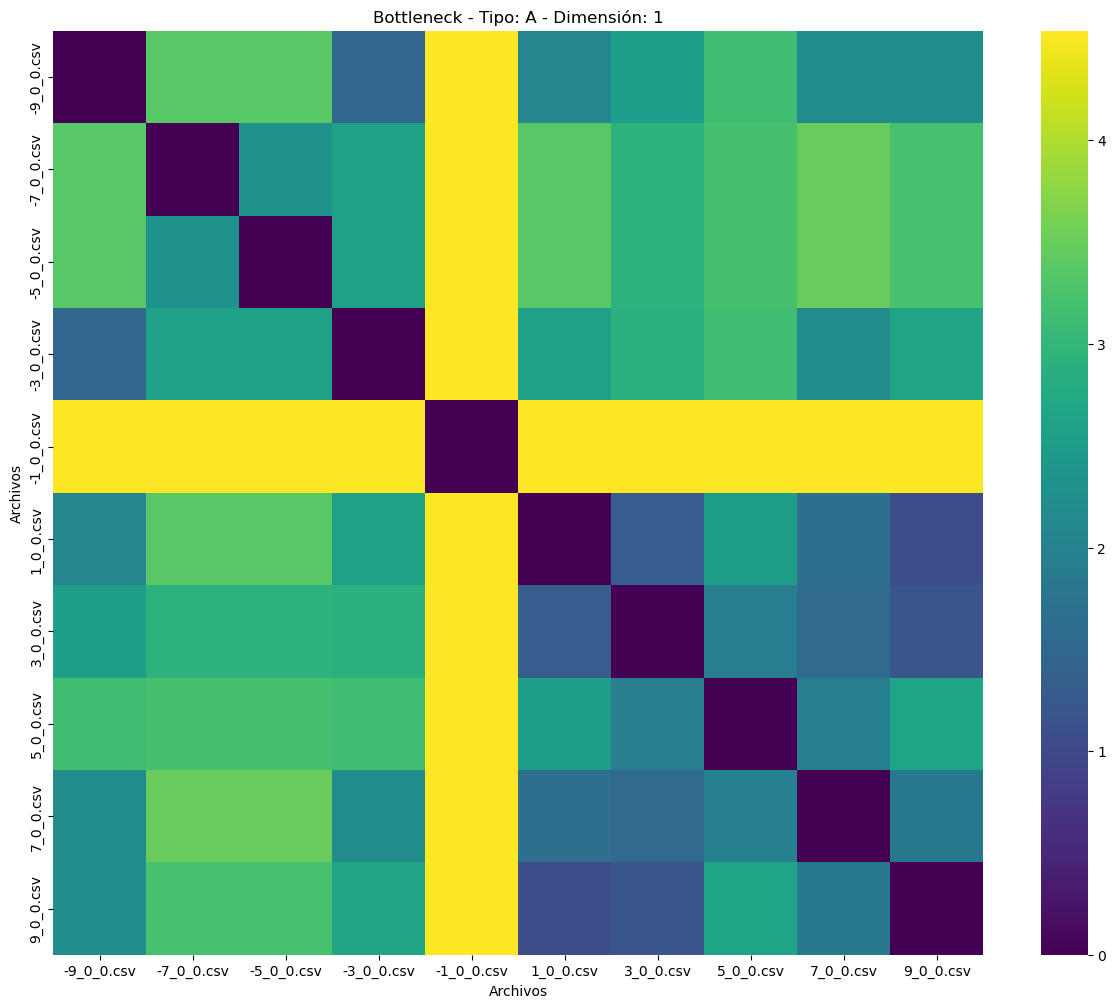

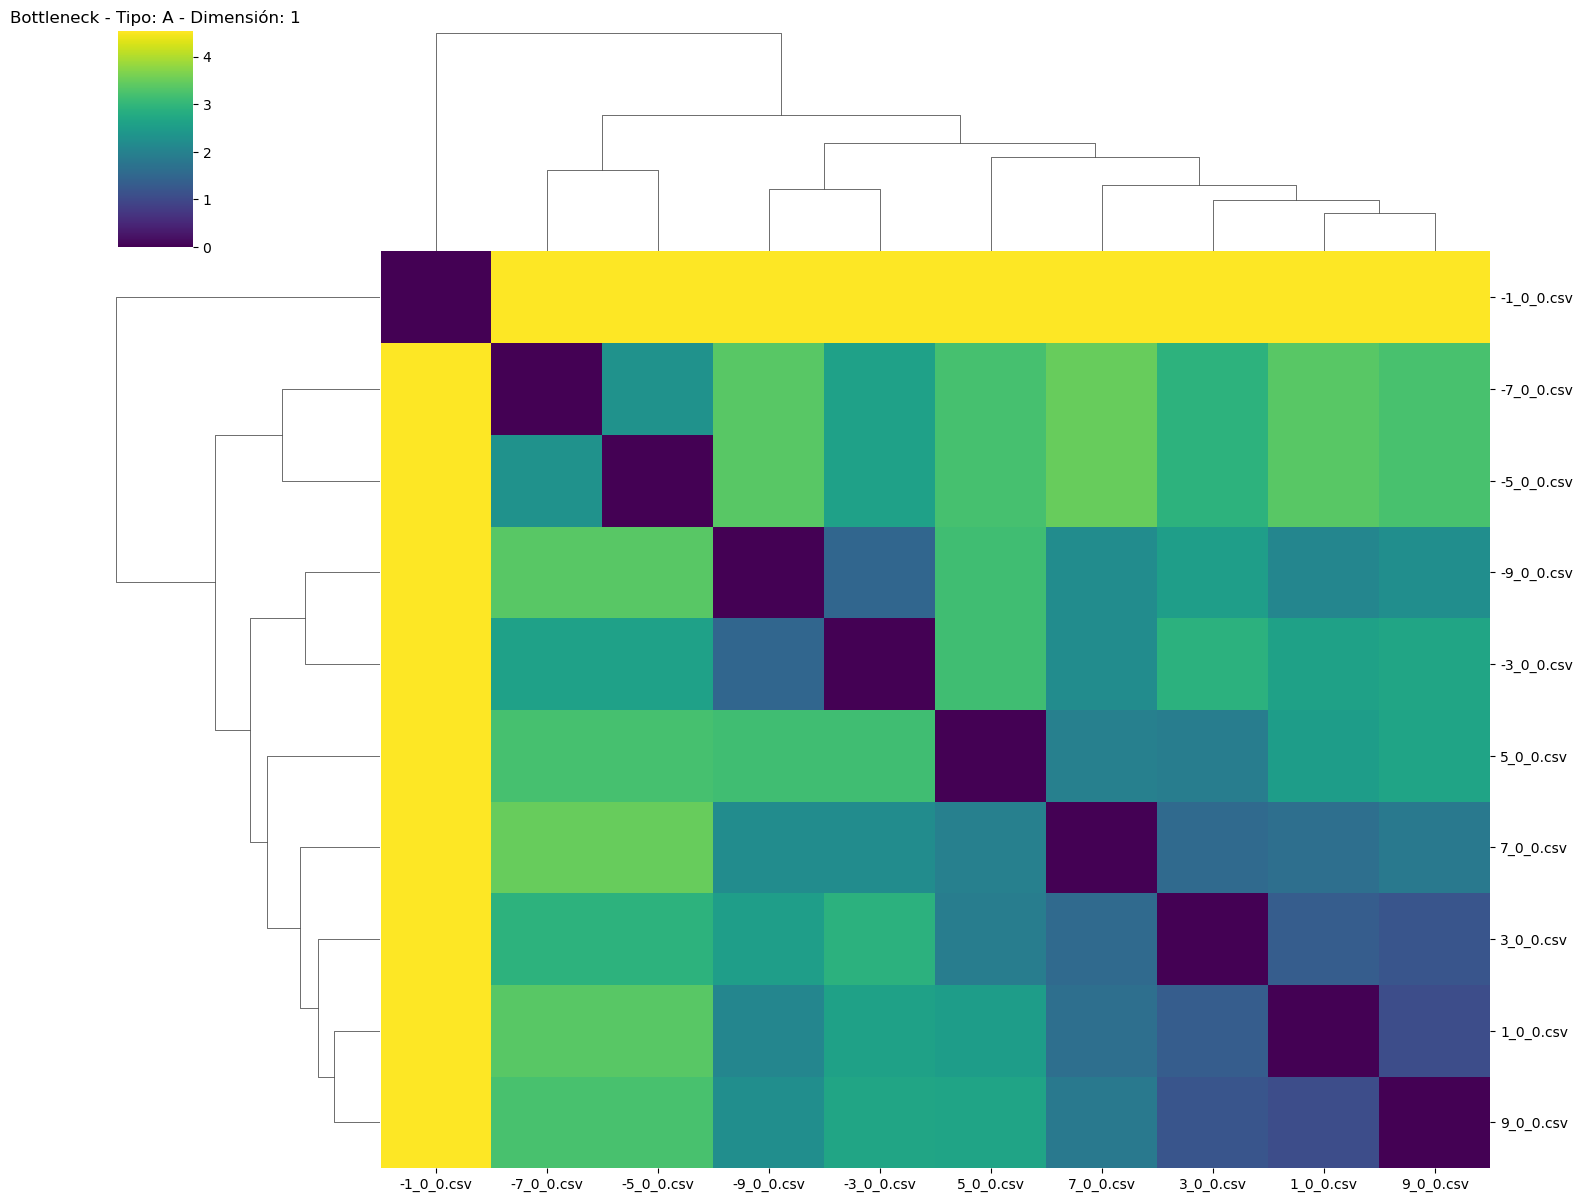

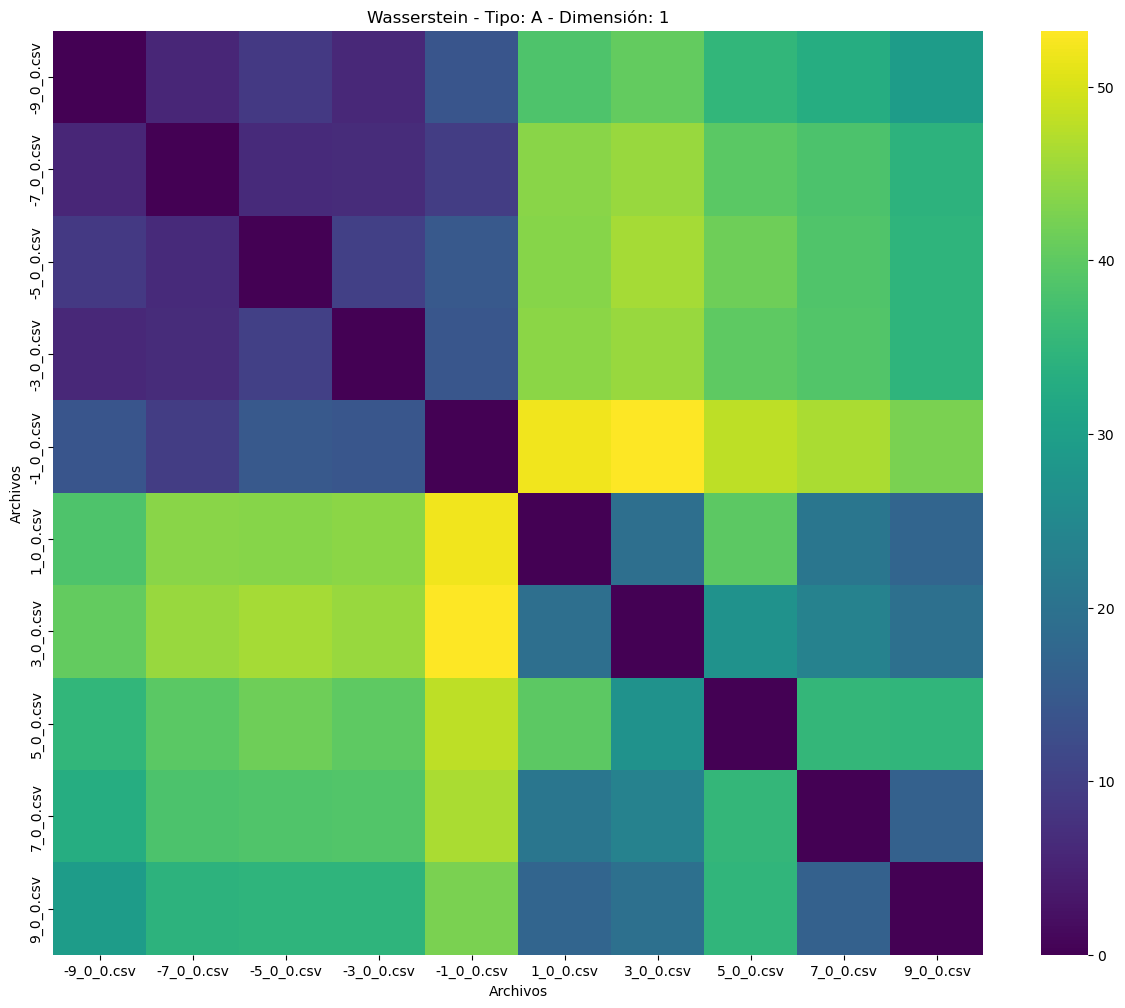

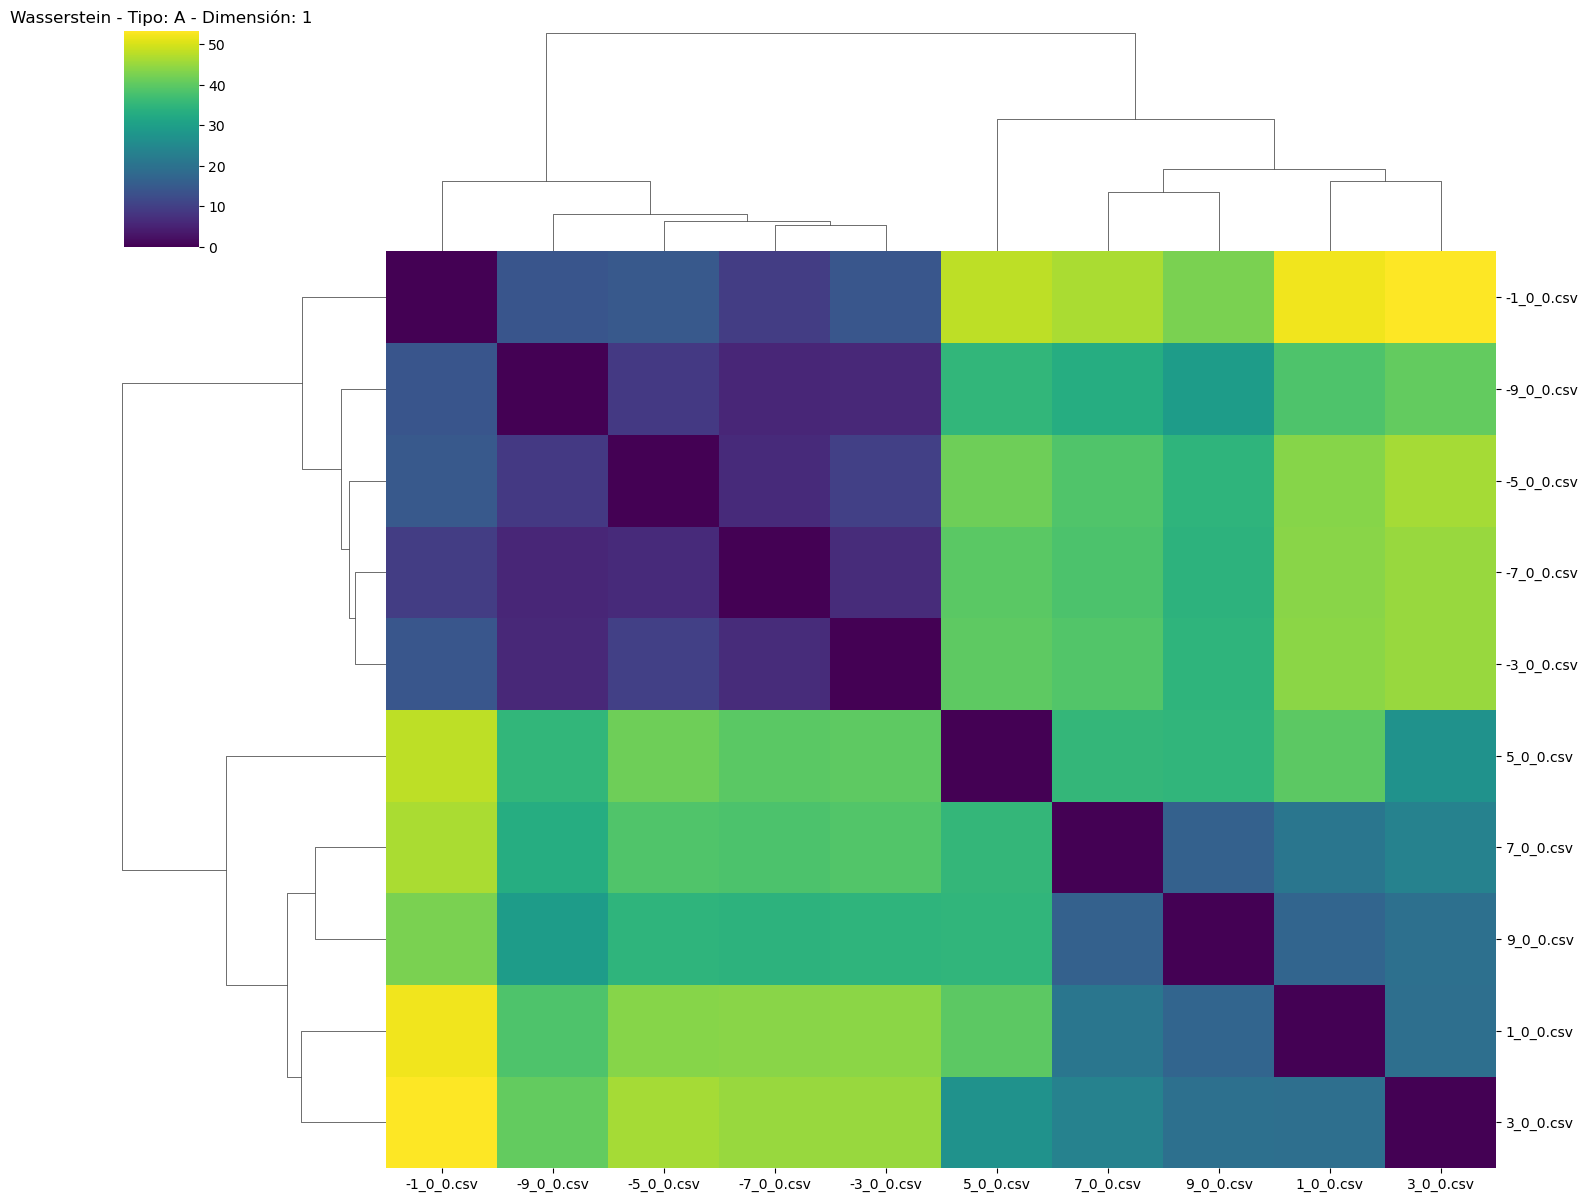

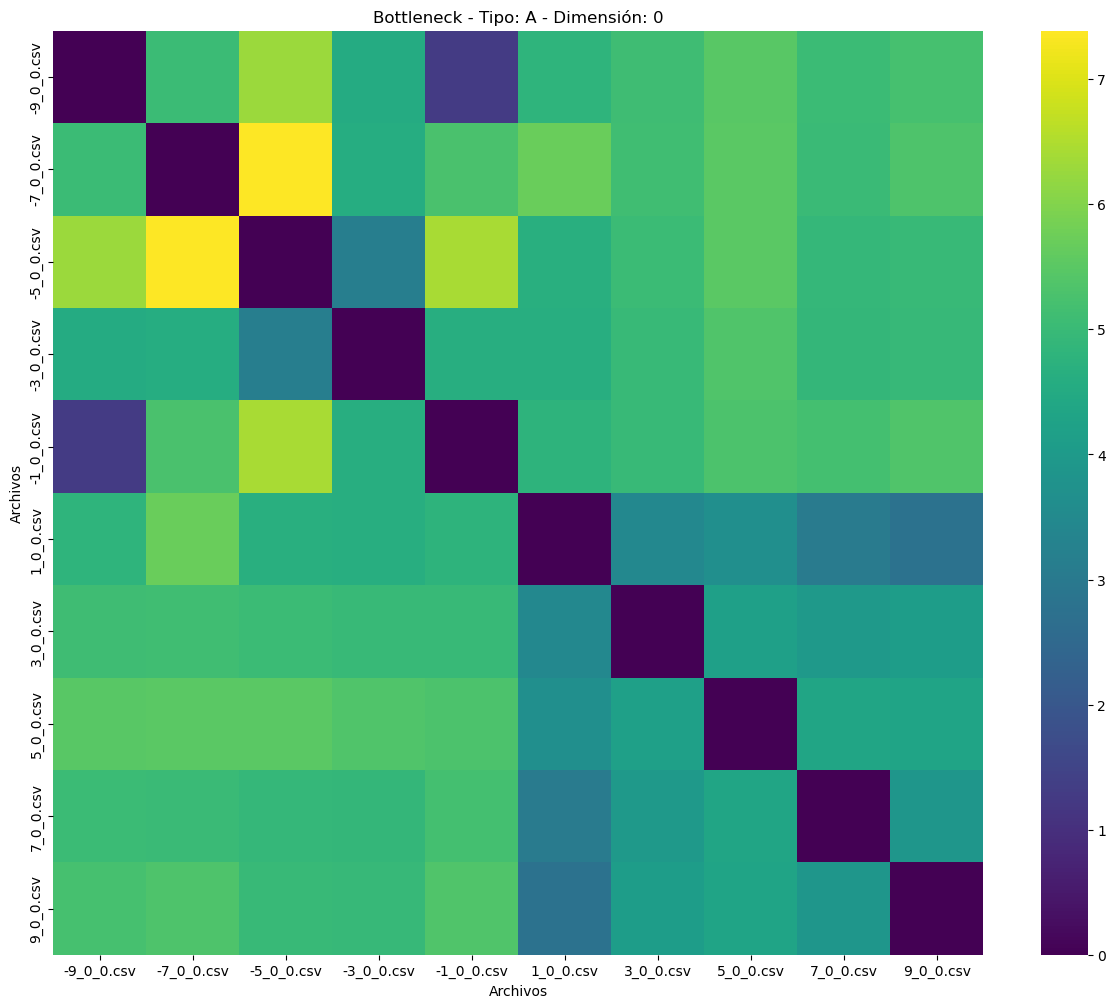

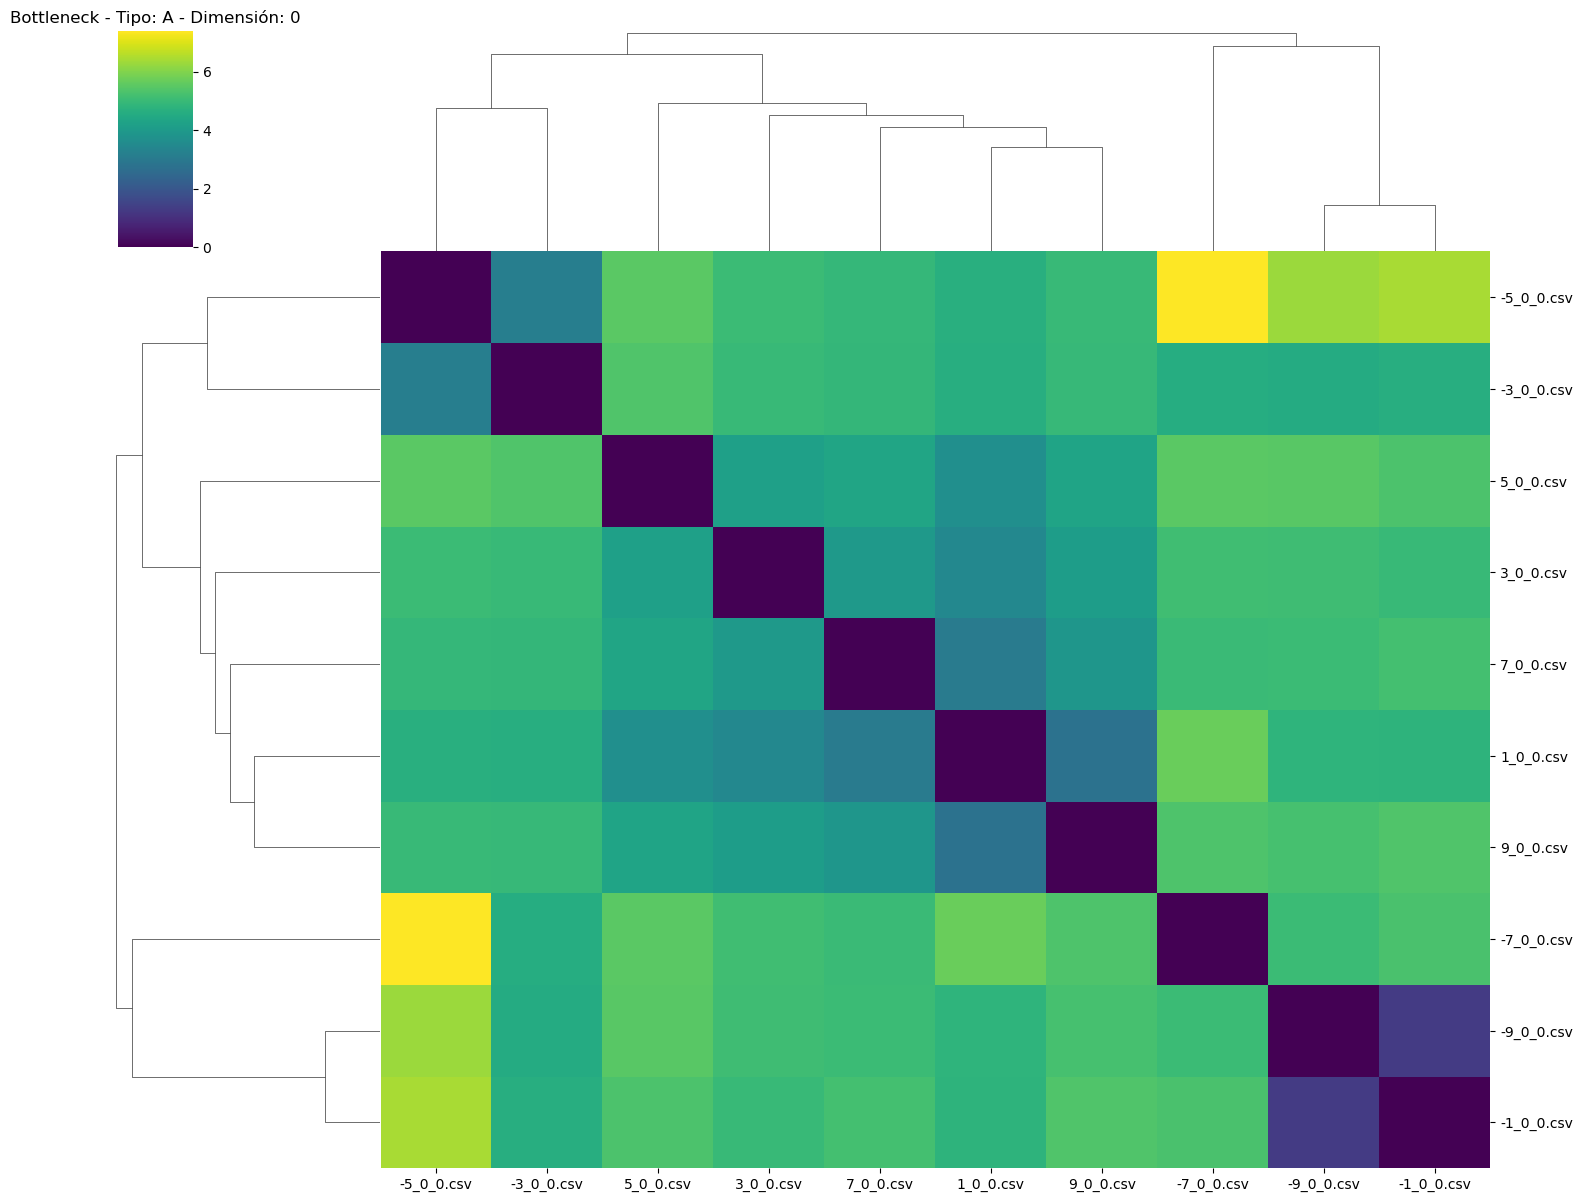

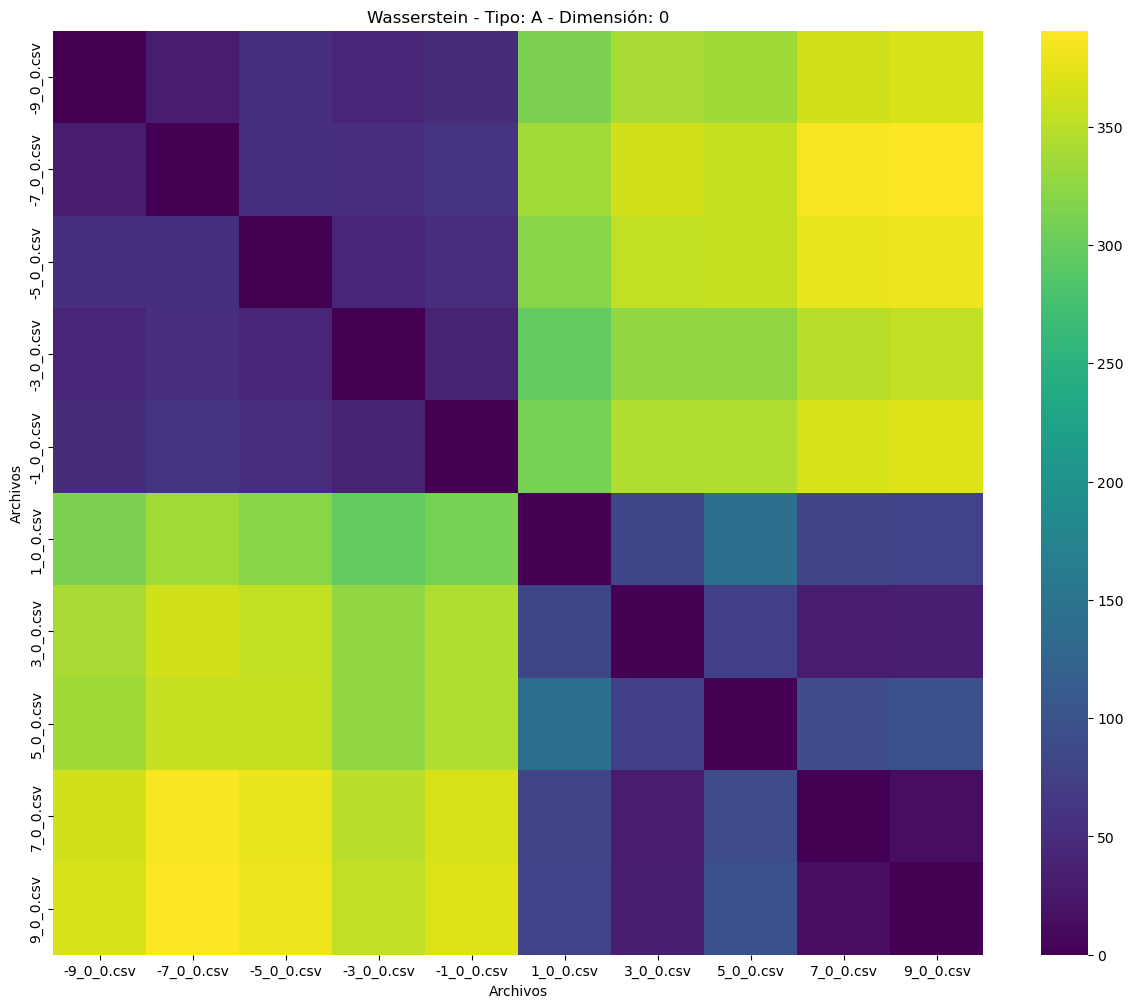

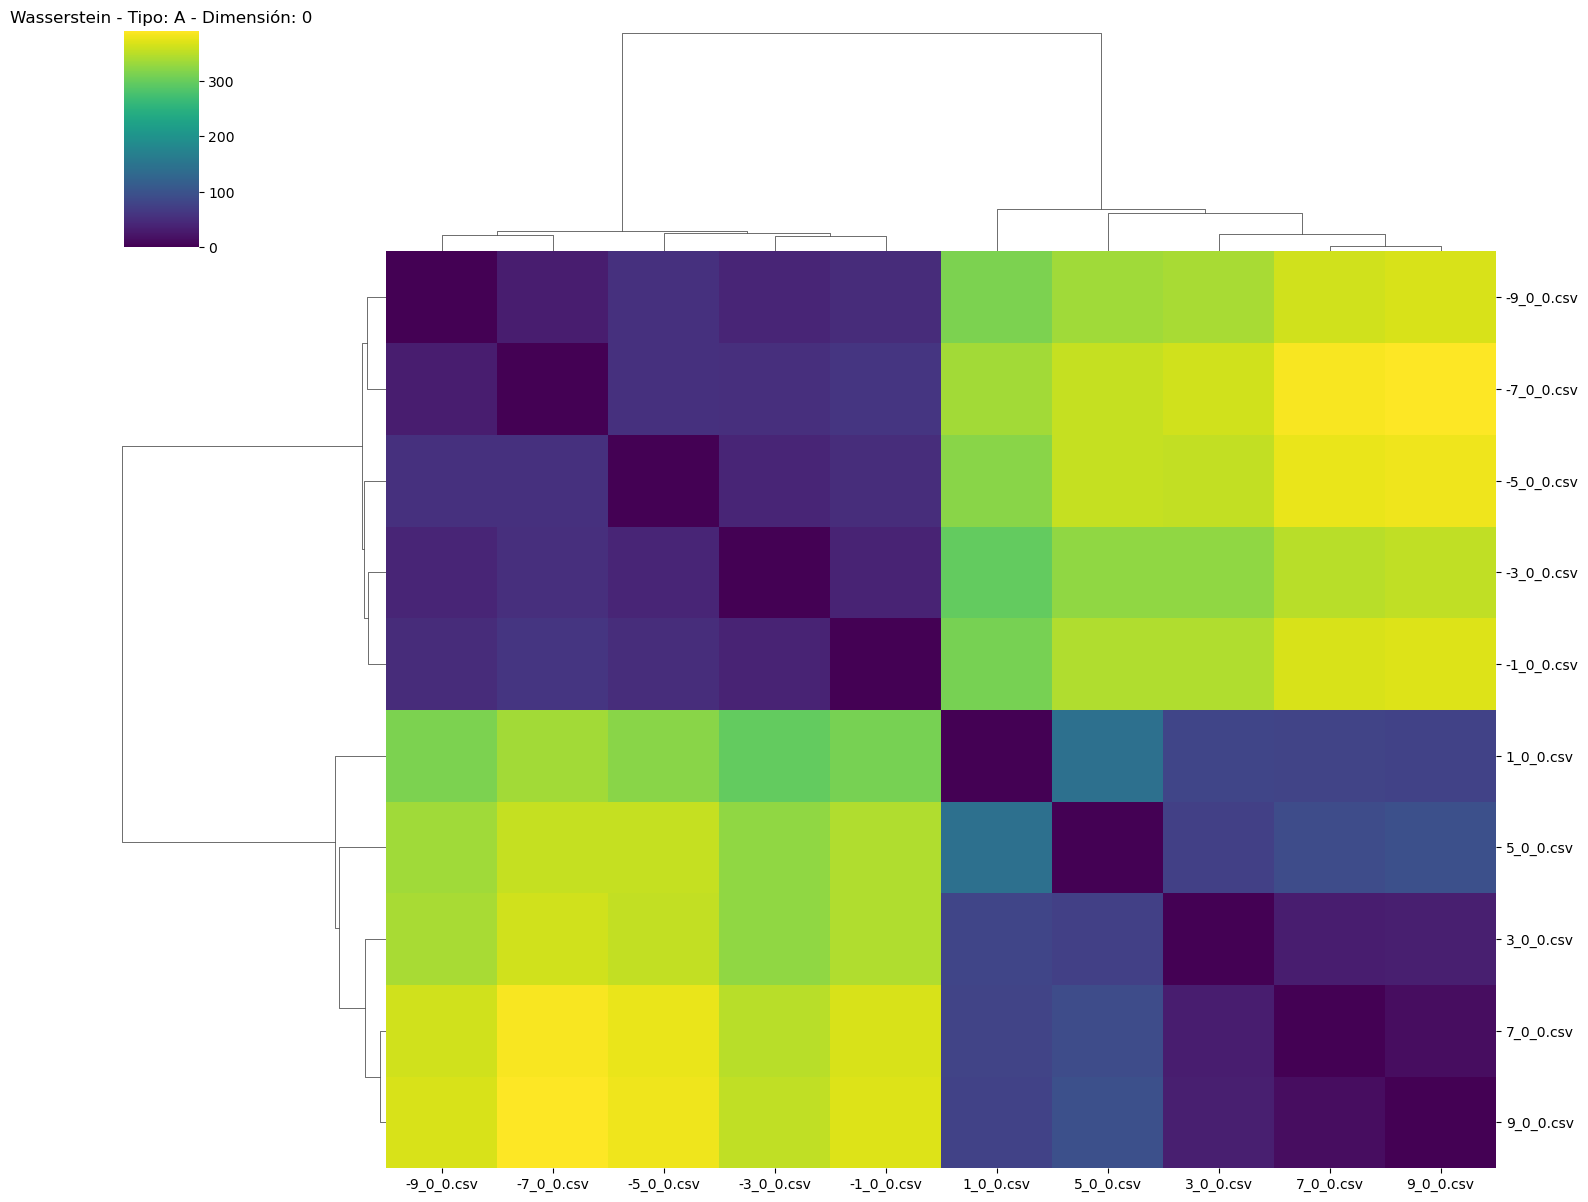

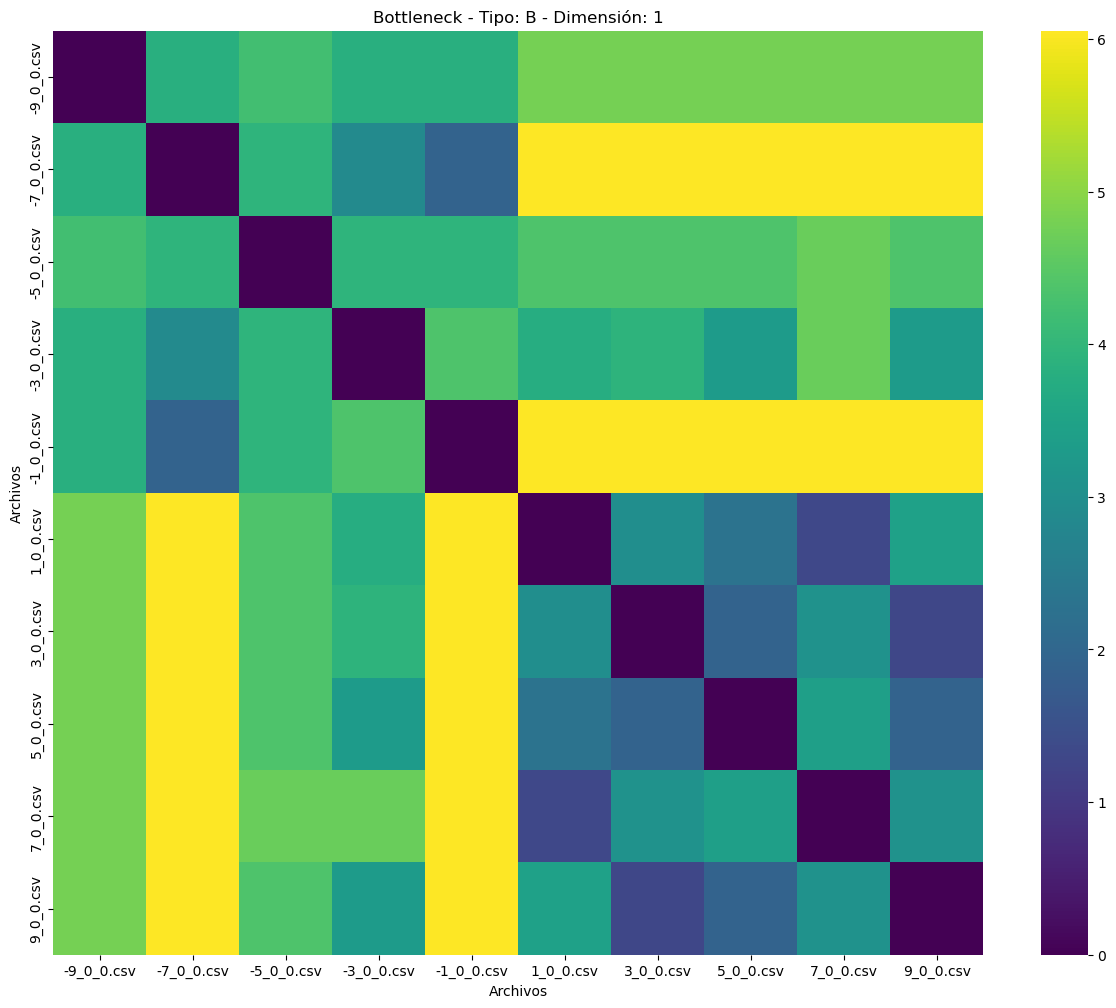

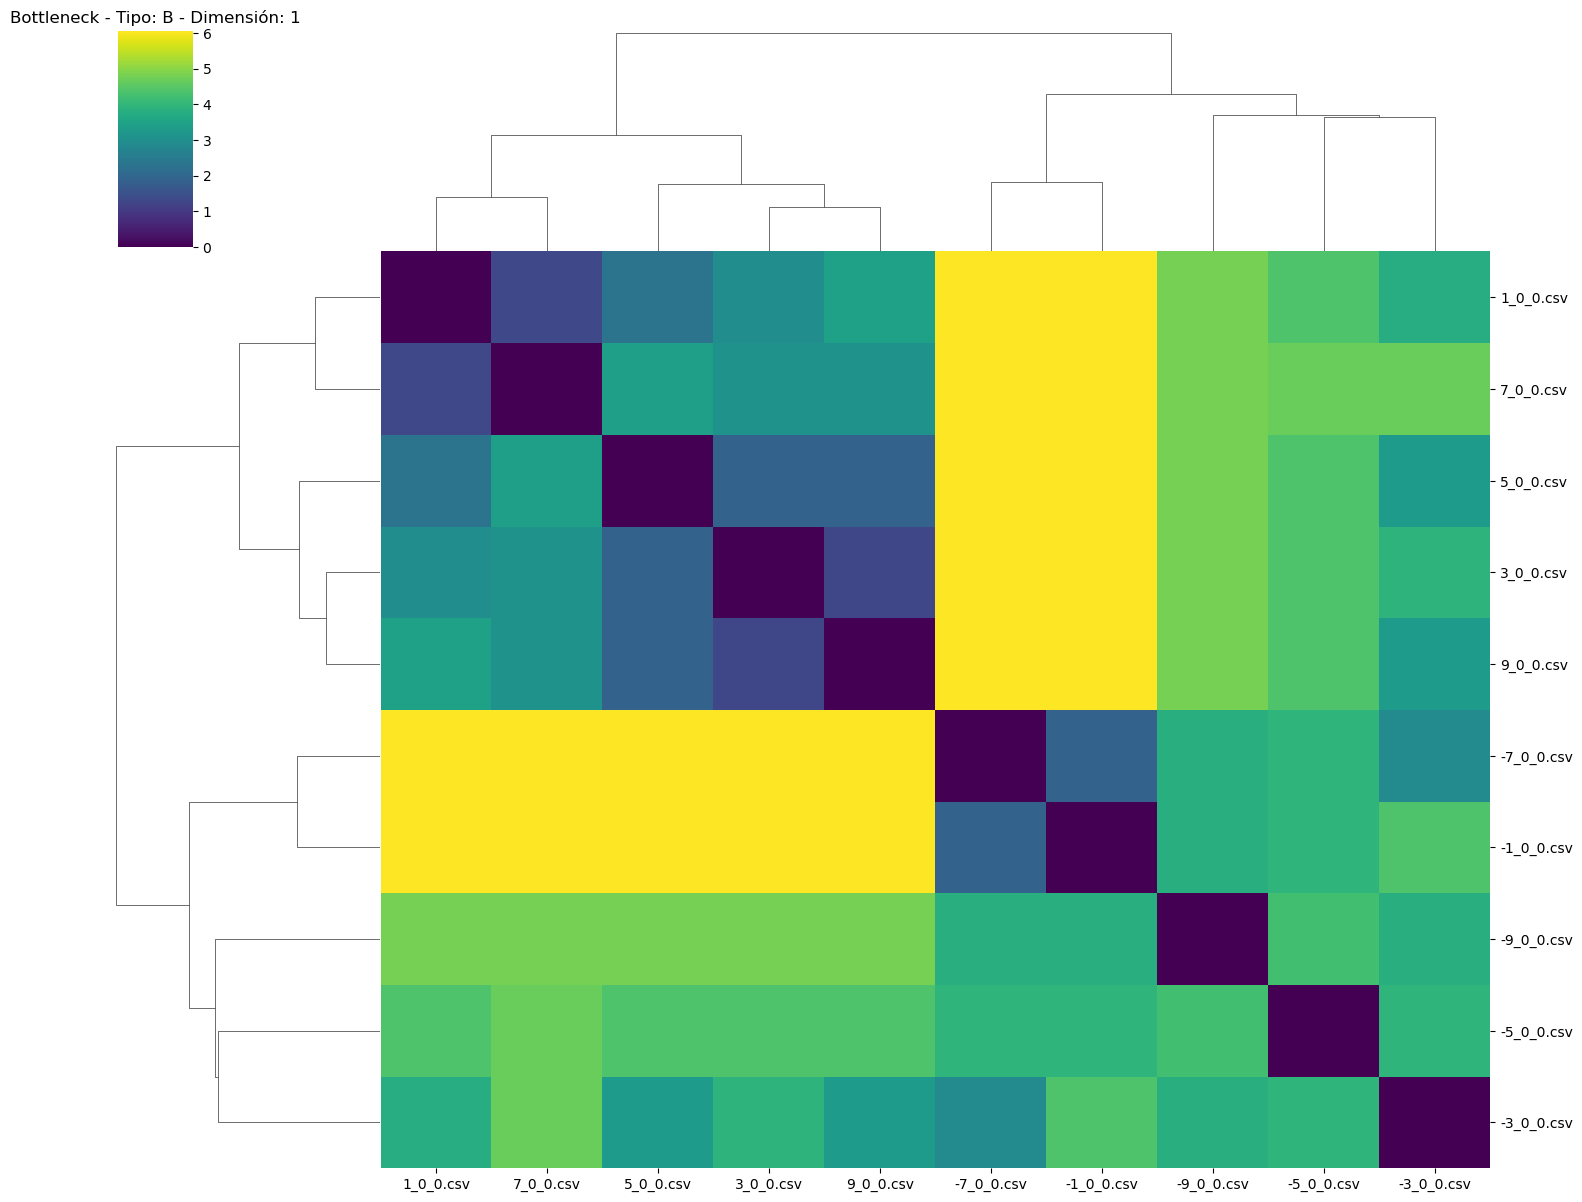

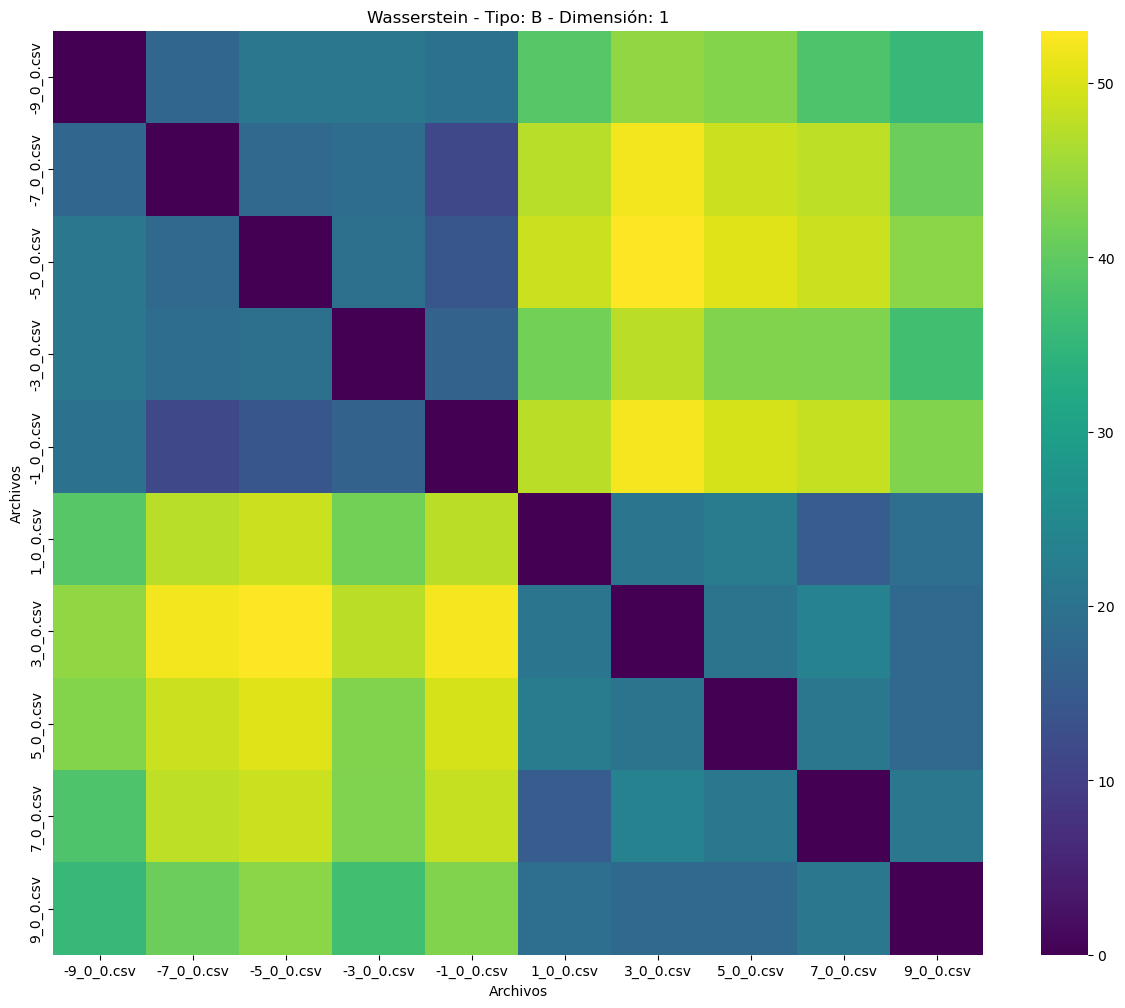

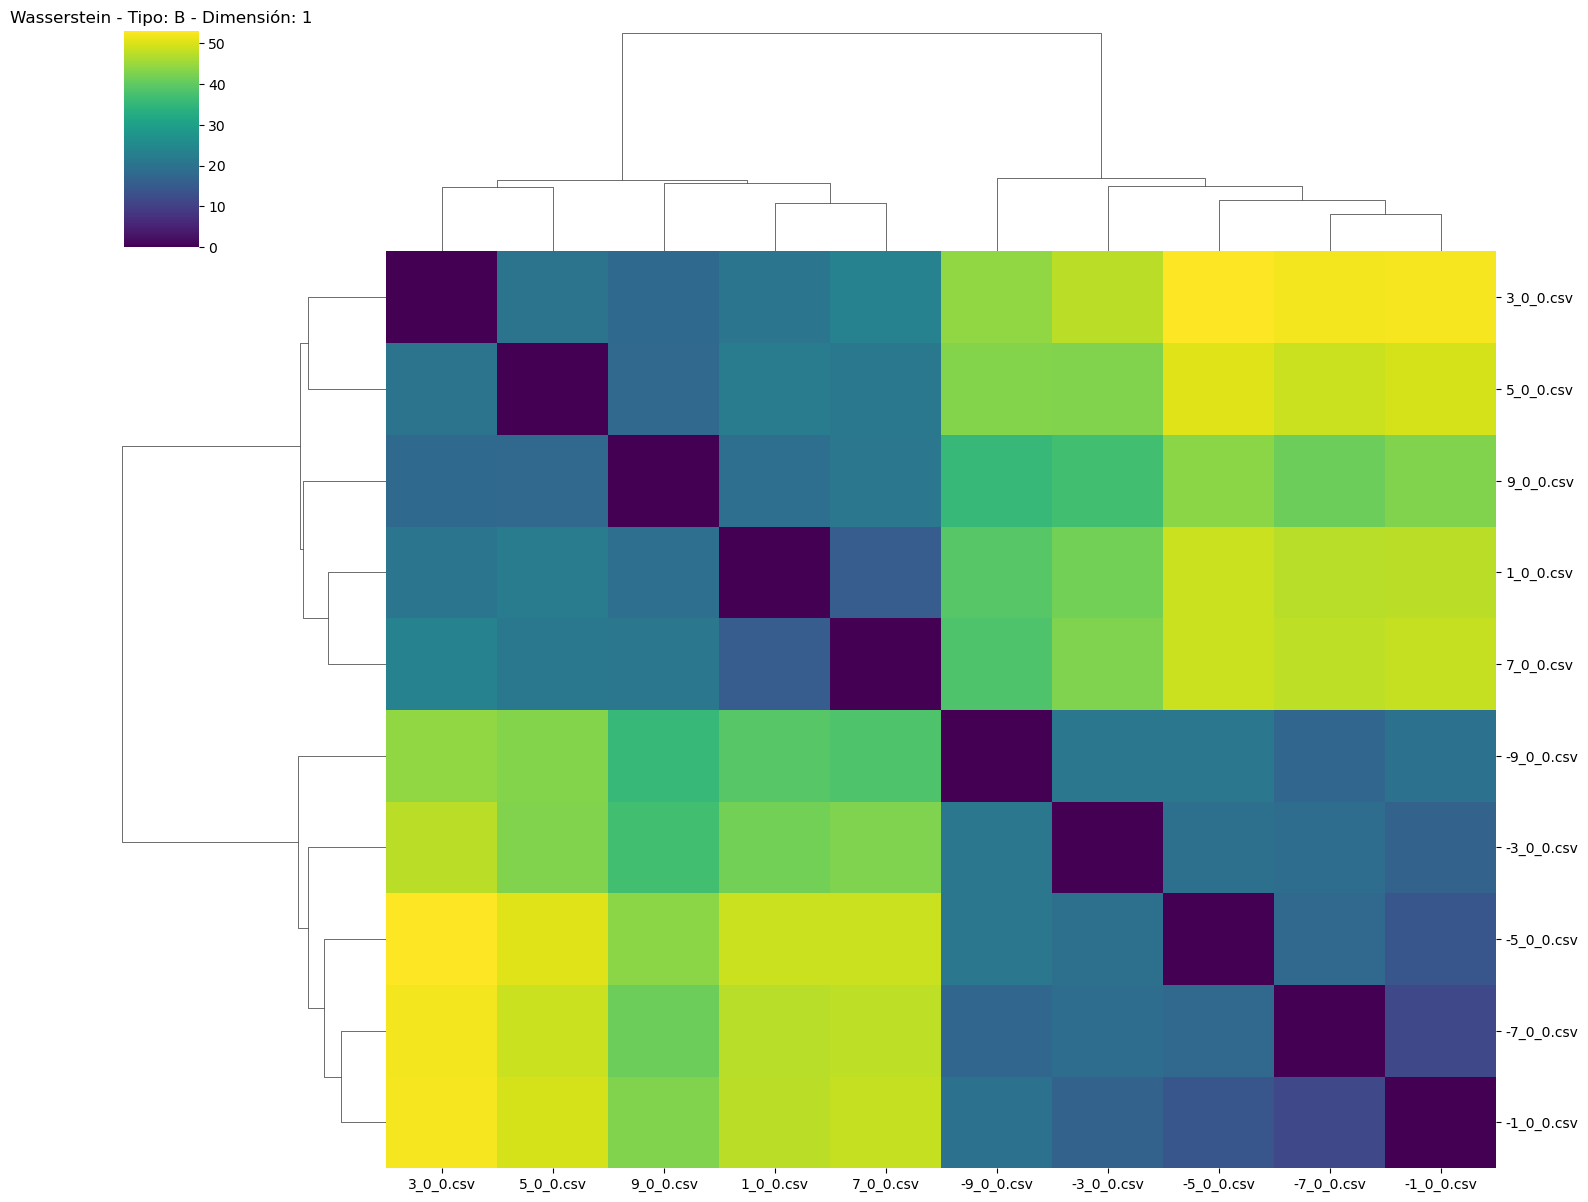

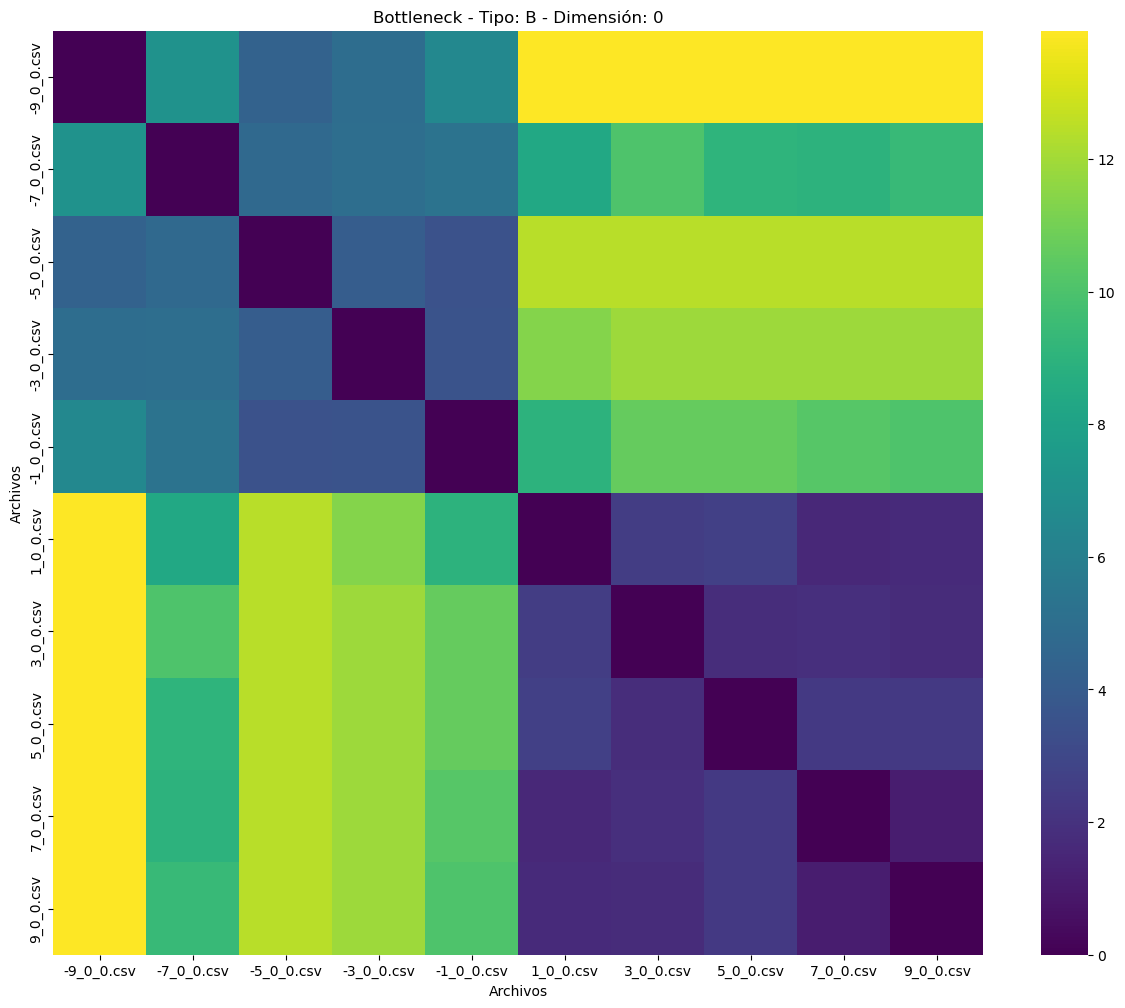

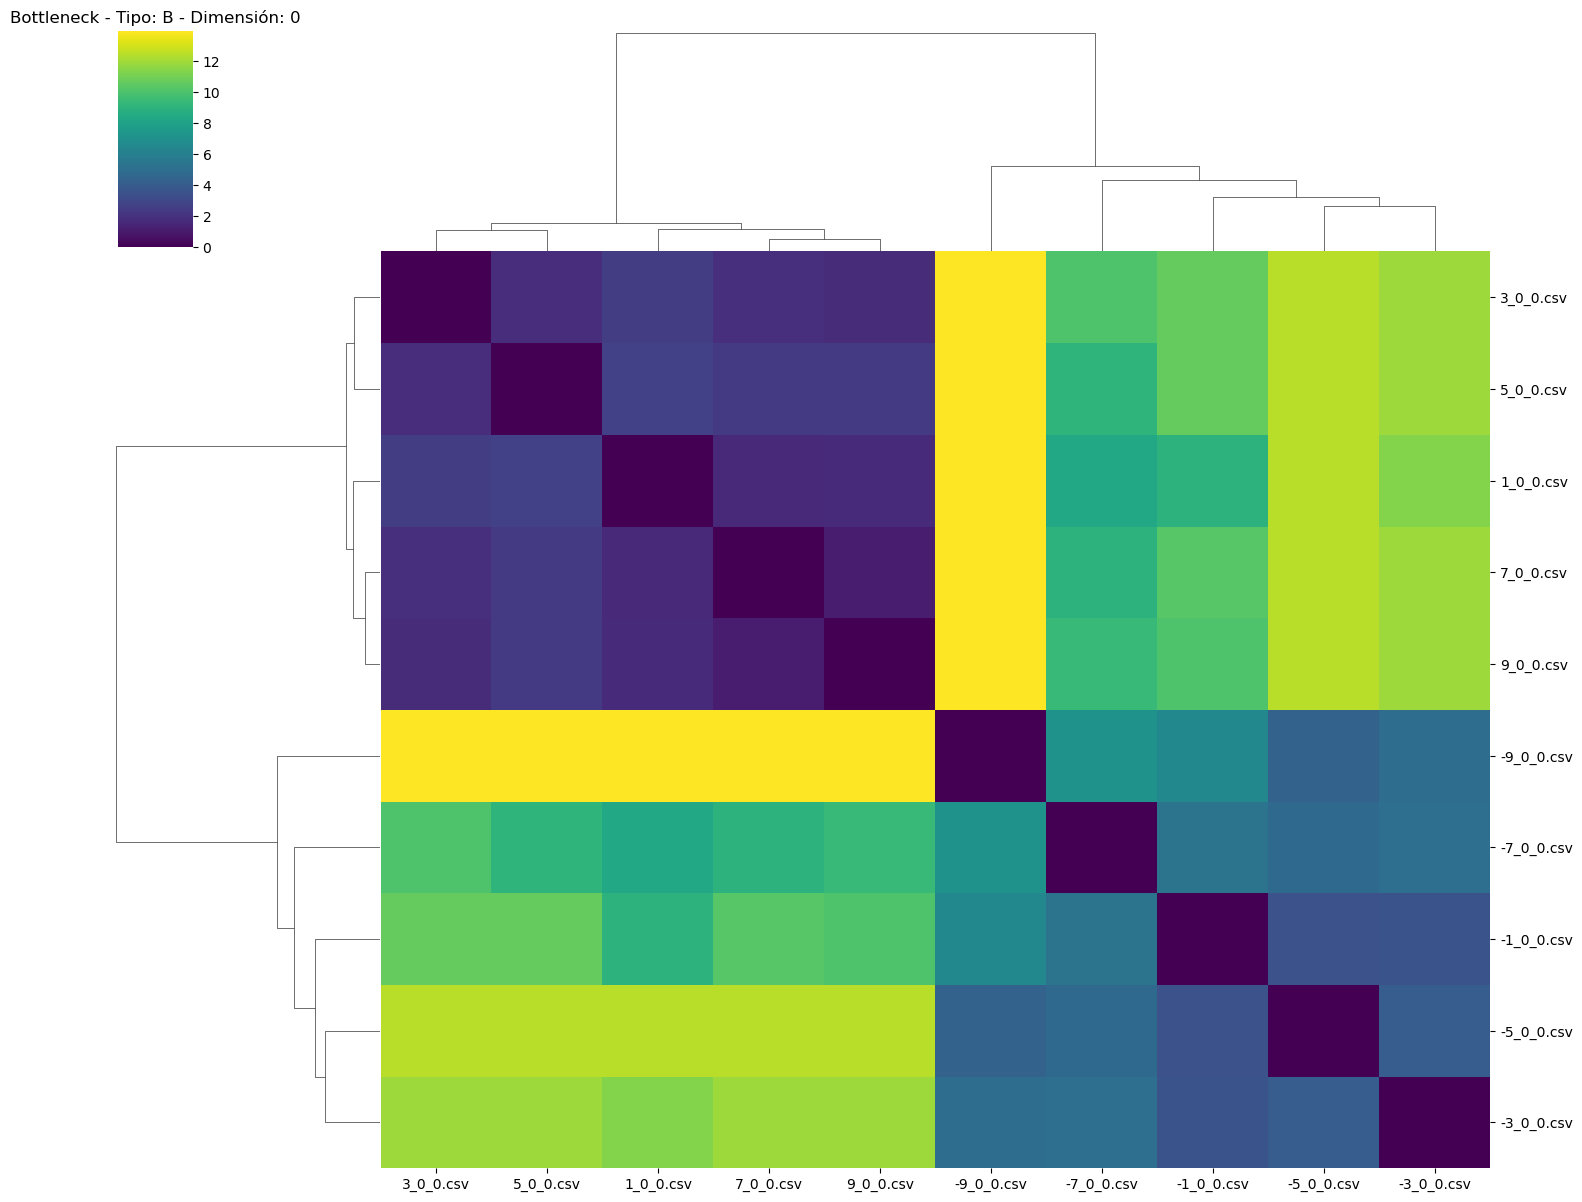

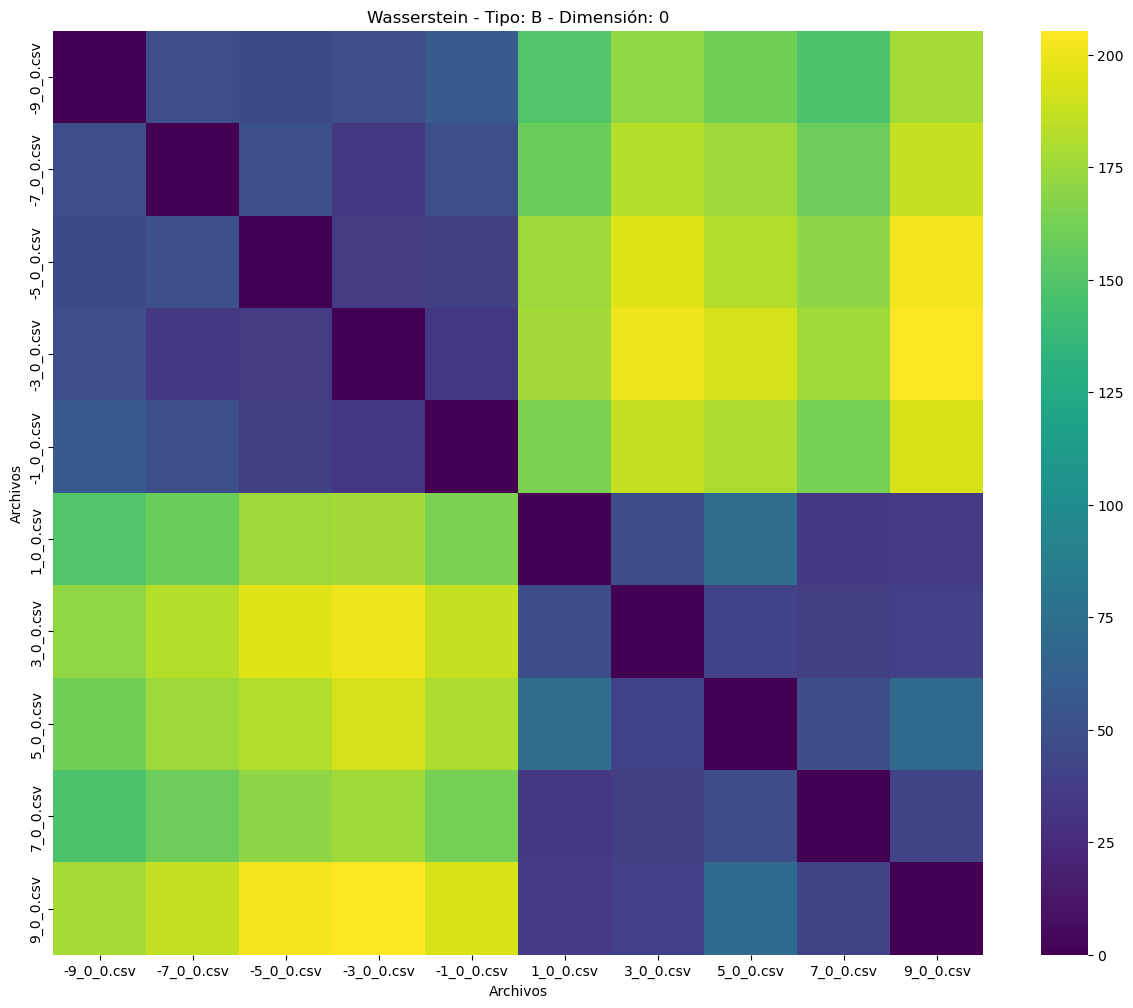

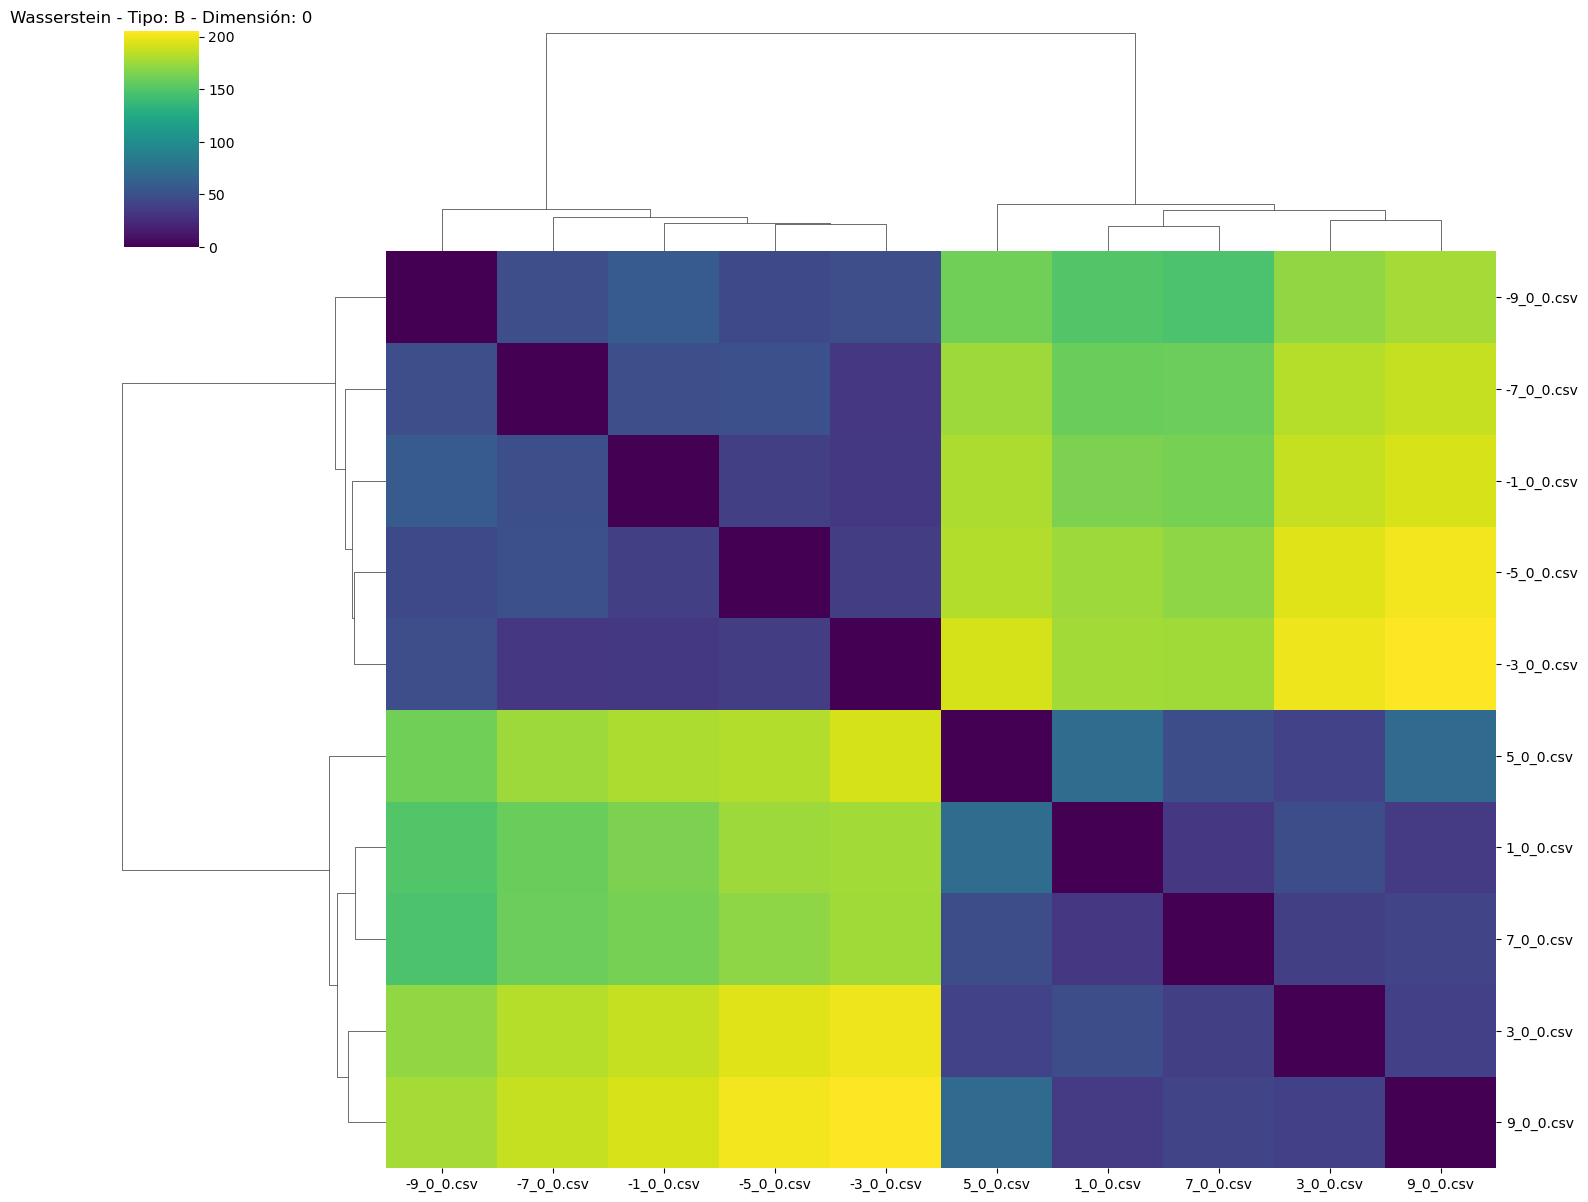

In [36]:
# Visualizar distancias por tipo
def visualize_distances_by_type(distancias_totales_por_tipo, distancias_por_tipo):
    for tipo, distancias in distancias_totales_por_tipo.items():
        # Obtener la matriz de distancias de Bottleneck y Wasserstein
        distancias_bottleneck = distancias['bottleneck']
        distancias_wasserstein = distancias['wasserstein']

        # Obtener los nombres de archivos correspondientes
        archivos = list(diagramas_persistencia[tipo].keys())

        # Crear heatmaps y clustermaps para Bottleneck (Dimensión 1)
        plot_heatmap_and_clustermap(distancias_bottleneck, archivos, f"Bottleneck - Tipo: {tipo} - Dimensión: 1")

        # Crear heatmaps y clustermaps para Wasserstein (Dimensión 1)
        plot_heatmap_and_clustermap(distancias_wasserstein, archivos, f"Wasserstein - Tipo: {tipo} - Dimensión: 1")

        # Para la dimensión 0, utilizar distancias desde distancias_por_tipo
        distancias_dim0_bottleneck = distancias_por_tipo[tipo]['dim0']
        distancias_dim0_wasserstein = distancias_wasserstein_por_tipo[tipo]['dim0']

        # Crear heatmaps y clustermaps para Bottleneck (Dimensión 0)
        plot_heatmap_and_clustermap(distancias_dim0_bottleneck, archivos, f"Bottleneck - Tipo: {tipo} - Dimensión: 0")

        # Crear heatmaps y clustermaps para Wasserstein (Dimensión 0)
        plot_heatmap_and_clustermap(distancias_dim0_wasserstein, archivos, f"Wasserstein - Tipo: {tipo} - Dimensión: 0")

# Llamar a la función de visualización
visualize_distances_by_type(distancias_totales_por_tipo, distancias_por_tipo)


Error al procesar el archivo .ipynb_checkpoints: [Errno 21] Is a directory: '/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/.ipynb_checkpoints'
Error al procesar el archivo centroides: [Errno 21] Is a directory: '/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv/centroides'
Distancia de Bottleneck (Dimensión 1) para -3_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -3_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para 9_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para 9_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para -1_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -1_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) para -5_0_0.csv en tipo A es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para -5_0_0.csv

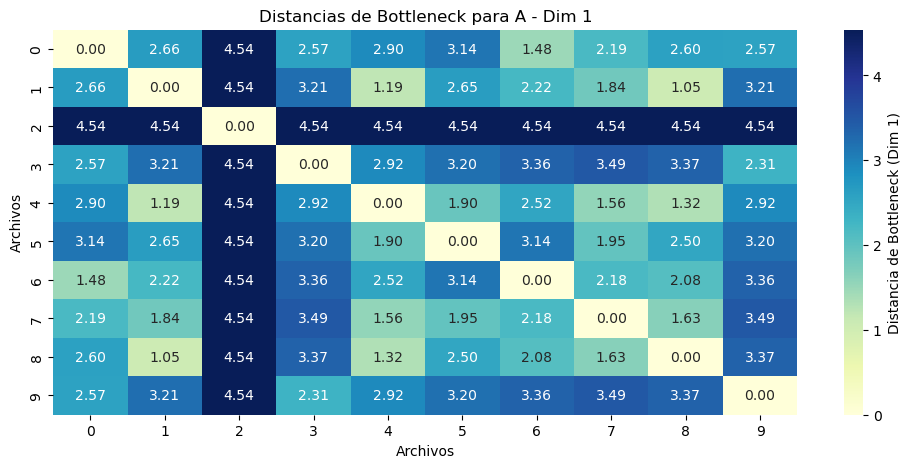

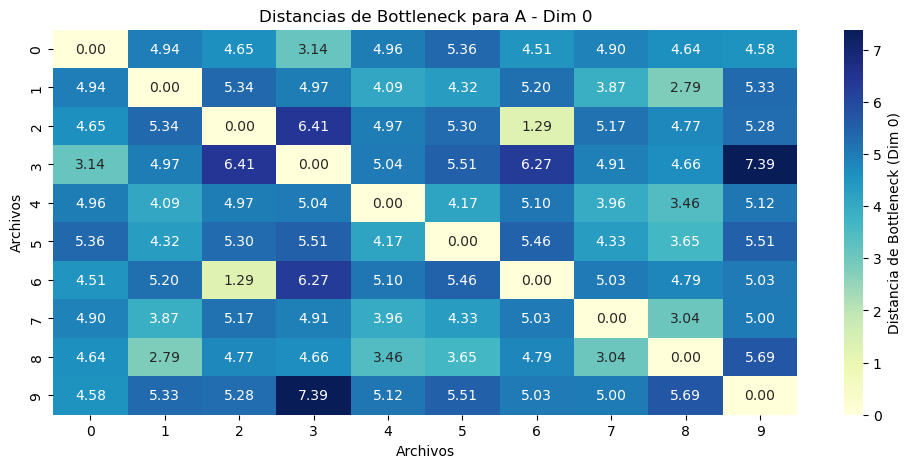

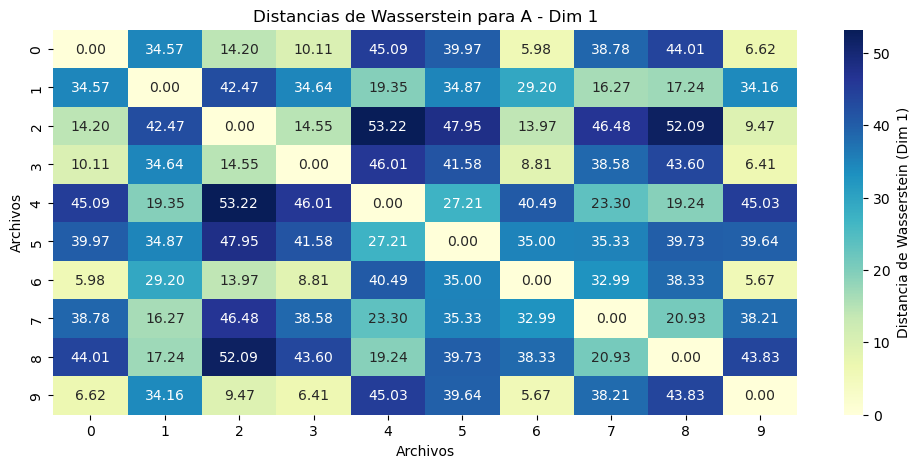

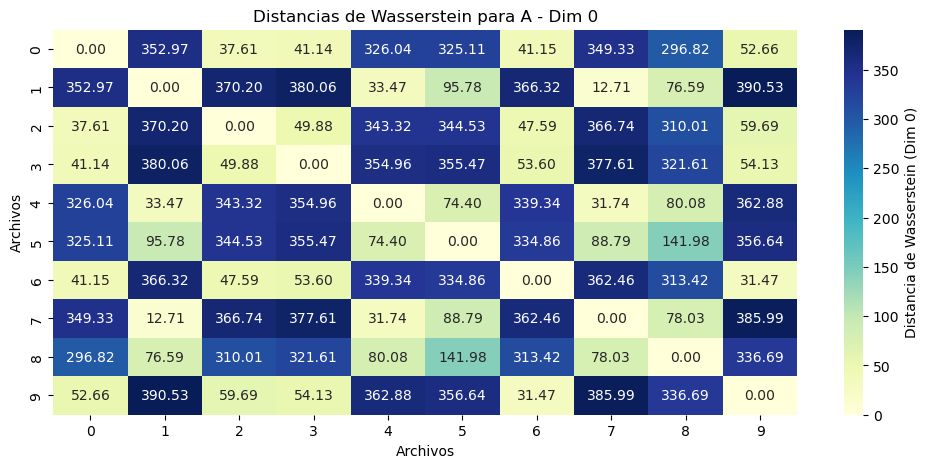

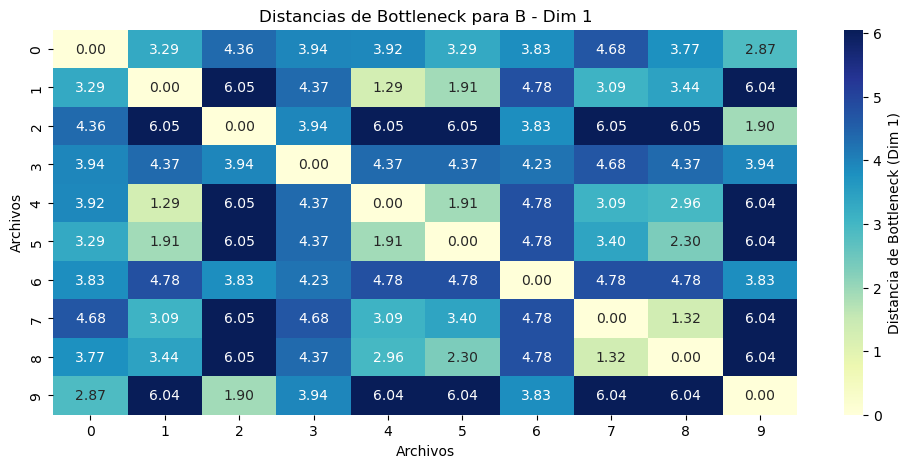

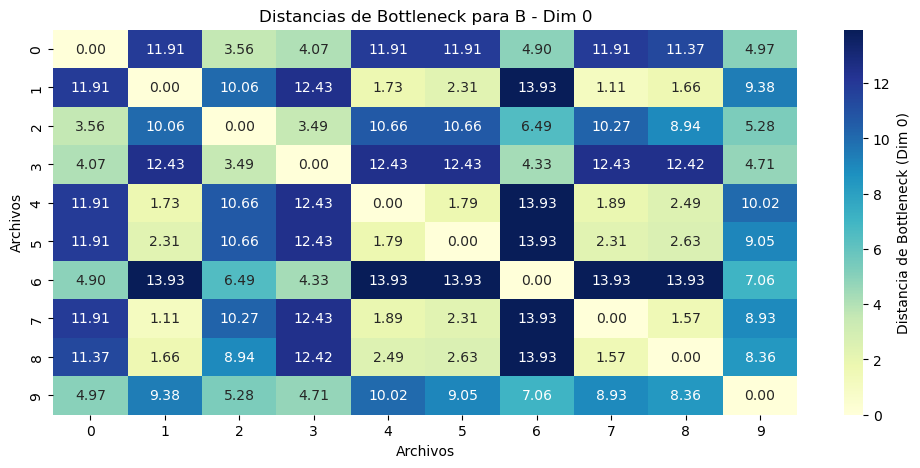

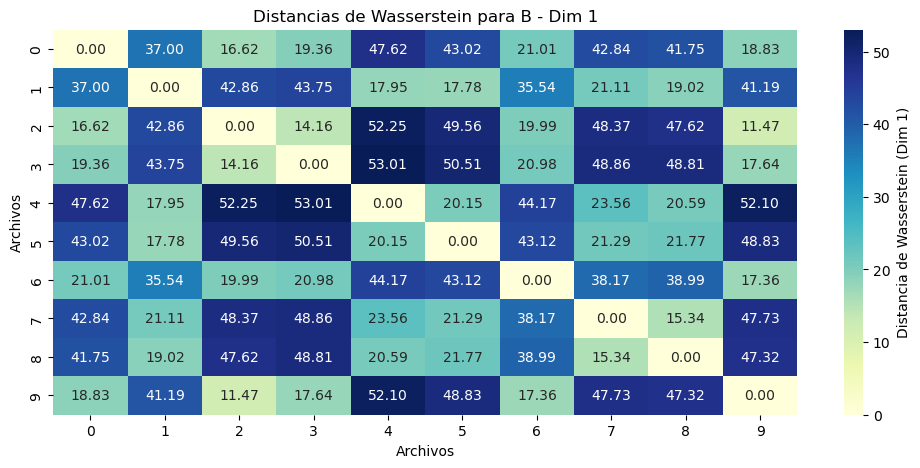

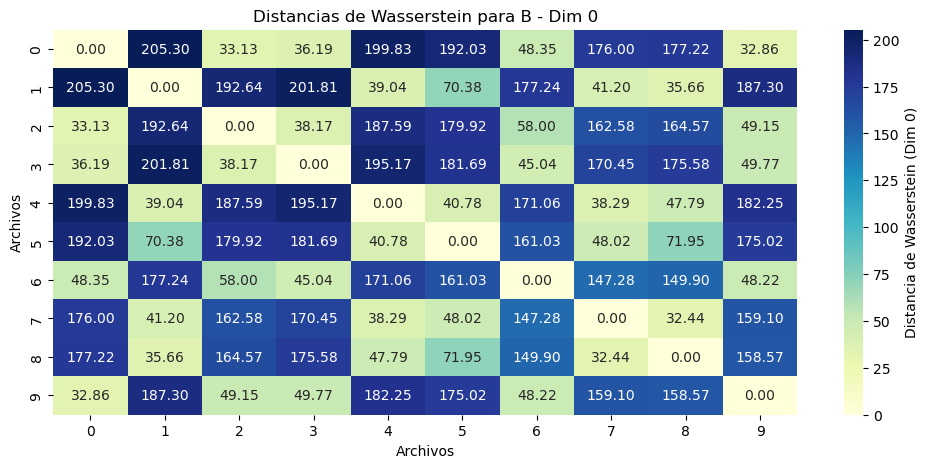

In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
import gudhi.wasserstein as gw
import seaborn as sns

# Definir la ruta del directorio y los archivos CSV
ruta_directorio = "/home/jupyter-user5/multicellularity_patterns_classification-/Corte1/carpeta_csv"
archivos_csv = os.listdir(ruta_directorio)

# Almacenar los diagramas de persistencia por tipo
diagramas_persistencia = {}
diagramas_persistencia_0 = {}

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    try:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa, header=None)
        nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
        df.columns = nombres_columnas
        
        # Agrupar los datos por el Tipo
        grupos_por_tipo = df.groupby('Tipo')
        
        # Inicializar un diccionario para almacenar resultados
        for tipo, grupo_tipo in grupos_por_tipo:
            # Agrupar por ID dentro de cada tipo
            grupos = grupo_tipo.groupby('id')
            
            # Inicializar listas para almacenar los centroides
            centroides_x = []
            centroides_y = []
            
            # Calcular el centroide para cada grupo
            for id_grupo, grupo in grupos:
                centroid_x_grupo = grupo['X'].mean()
                centroid_y_grupo = grupo['Y'].mean()
                centroides_x.append(centroid_x_grupo)
                centroides_y.append(centroid_y_grupo)
            
            # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
            puntos = np.array(list(zip(centroides_x, centroides_y)))

            # Calcular el complejo de Rips con un radio específico
            rips_complex = gd.RipsComplex(points=puntos, max_edge_length=40)
            simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

            # Calcular el diagrama de persistencia
            diag = simplex_tree.persistence()

            # Almacenar los diagramas de persistencia por tipo
            if tipo not in diagramas_persistencia:
                diagramas_persistencia[tipo] = {}
                diagramas_persistencia_0[tipo] = {}
            
            diagramas_persistencia[tipo][archivo_csv] = simplex_tree.persistence_intervals_in_dimension(1)
            diagramas_persistencia_0[tipo][archivo_csv] = simplex_tree.persistence_intervals_in_dimension(0)
        
    except Exception as e:
        print(f"Error al procesar el archivo {archivo_csv}: {e}")

# Calcular las distancias de Bottleneck entre todos los pares de diagramas de persistencia por tipo
tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

# Inicializar diccionario para almacenar distancias de Bottleneck
distancias_por_tipo = {}

for tipo in diagramas_persistencia.keys():
    archivos = list(diagramas_persistencia[tipo].keys())
    n = len(archivos)
    
    distancias_dim1 = np.zeros((n, n))
    distancias_dim0 = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            archivo_i = archivos[i]
            archivo_j = archivos[j]
            diag_i = diagramas_persistencia[tipo][archivo_i]
            diag_j = diagramas_persistencia[tipo][archivo_j]
            diag_i_0 = diagramas_persistencia_0[tipo][archivo_i]
            diag_j_0 = diagramas_persistencia_0[tipo][archivo_j]
            
            distancia_bottleneck = gd.bottleneck_distance(diag_i, diag_j)
            distancia_bottleneck_0 = gd.bottleneck_distance(diag_i_0, diag_j_0)
            
            distancias_dim1[i, j] = distancia_bottleneck
            distancias_dim1[j, i] = distancia_bottleneck
            distancias_dim0[i, j] = distancia_bottleneck_0
            distancias_dim0[j, i] = distancia_bottleneck_0
            
            # Verificar que la distancia de Bottleneck para el mismo archivo es efectivamente cero
            if i == j:
                if distancia_bottleneck < tolerancia:
                    print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} en tipo {tipo} es efectivamente cero.")
                else:
                    print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} en tipo {tipo} no es cero: {distancia_bottleneck}")
                
                if distancia_bottleneck_0 < tolerancia:
                    print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} en tipo {tipo} es efectivamente cero.")
                else:
                    print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} en tipo {tipo} no es cero: {distancia_bottleneck_0}")
    
    # Almacenar las distancias en el diccionario por tipo
    distancias_por_tipo[tipo] = {
        'dim1': distancias_dim1,
        'dim0': distancias_dim0,
        # 'suma': distancias_dim1 + distancias_dim0  # Eliminar si no es necesario
    }

# Calcular las distancias de Wasserstein entre todos los pares de diagramas de persistencia por tipo
# Inicializar diccionario para almacenar distancias de Wasserstein
distancias_wasserstein_por_tipo = {}

for tipo in diagramas_persistencia.keys():
    archivos = list(diagramas_persistencia[tipo].keys())
    n = len(archivos)
    
    distancias_wasserstein_dim1 = np.zeros((n, n))
    distancias_wasserstein_dim0 = np.zeros((n, n))

    for i in range(n):
        for j in range(i, n):
            archivo_i = archivos[i]
            archivo_j = archivos[j]
            diag_i = diagramas_persistencia[tipo][archivo_i]
            diag_j = diagramas_persistencia[tipo][archivo_j]
            diag_i_0 = diagramas_persistencia_0[tipo][archivo_i]
            diag_j_0 = diagramas_persistencia_0[tipo][archivo_j]
            
            distancia_wasserstein = gw.wasserstein_distance(diag_i, diag_j, order=1)
            distancia_wasserstein_0 = gw.wasserstein_distance(diag_i_0, diag_j_0, order=1)

            distancias_wasserstein_dim1[i, j] = distancia_wasserstein
            distancias_wasserstein_dim1[j, i] = distancia_wasserstein
            distancias_wasserstein_dim0[i, j] = distancia_wasserstein_0
            distancias_wasserstein_dim0[j, i] = distancia_wasserstein_0
            
            if i == j:
                if distancia_wasserstein < tolerancia:
                    print(f"Distancia de Wasserstein (Dimensión 1) para {archivo_i} en tipo {tipo} es efectivamente cero.")
                else:
                    print(f"Distancia de Wasserstein (Dimensión 1) para {archivo_i} en tipo {tipo} no es cero: {distancia_wasserstein}")
                
                if distancia_wasserstein_0 < tolerancia:
                    print(f"Distancia de Wasserstein (Dimensión 0) para {archivo_i} en tipo {tipo} es efectivamente cero.")
                else:
                    print(f"Distancia de Wasserstein (Dimensión 0) para {archivo_i} en tipo {tipo} no es cero: {distancia_wasserstein_0}")
    
    # Almacenar las distancias en el diccionario por tipo
    distancias_wasserstein_por_tipo[tipo] = {
        'dim1': distancias_wasserstein_dim1,
        'dim0': distancias_wasserstein_dim0,
    }

# Visualizar las distancias de Bottleneck y Wasserstein
for tipo in distancias_por_tipo.keys():
    # Visualizar distancias de Bottleneck
    plt.figure(figsize=(12, 5))
    sns.heatmap(distancias_por_tipo[tipo]['dim1'], annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={"label": "Distancia de Bottleneck (Dim 1)"})
    plt.title(f'Distancias de Bottleneck para {tipo} - Dim 1')
    plt.xlabel('Archivos')
    plt.ylabel('Archivos')
    plt.show()

    plt.figure(figsize=(12, 5))
    sns.heatmap(distancias_por_tipo[tipo]['dim0'], annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={"label": "Distancia de Bottleneck (Dim 0)"})
    plt.title(f'Distancias de Bottleneck para {tipo} - Dim 0')
    plt.xlabel('Archivos')
    plt.ylabel('Archivos')
    plt.show()

    # Visualizar distancias de Wasserstein
    plt.figure(figsize=(12, 5))
    sns.heatmap(distancias_wasserstein_por_tipo[tipo]['dim1'], annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={"label": "Distancia de Wasserstein (Dim 1)"})
    plt.title(f'Distancias de Wasserstein para {tipo} - Dim 1')
    plt.xlabel('Archivos')
    plt.ylabel('Archivos')
    plt.show()

    plt.figure(figsize=(12, 5))
    sns.heatmap(distancias_wasserstein_por_tipo[tipo]['dim0'], annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={"label": "Distancia de Wasserstein (Dim 0)"})
    plt.title(f'Distancias de Wasserstein para {tipo} - Dim 0')
    plt.xlabel('Archivos')
    plt.ylabel('Archivos')
    plt.show()
